In [16]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
#* magic to add python path to notebook environment
import sys
pypath = sys.path[0]
%env PYTHONPATH $pypath

import awkward as ak
import numpy as np

from iminuit import minimize
from python.analysis import cross_section, Tags, Plots, Master, vector
from apps.cex_analyse import BeamPionSelection
from apps import cex_beam_reweight
cross_section.SetPlotStyle(extend_colors = True, dpi = 100)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: PYTHONPATH=/home/sb16165/Documents/pi0-analysis/analysis


In [2]:
args_pion = cross_section.ApplicationArguments.ResolveConfig(cross_section.LoadConfiguration("work/2023/cex_analysis_2GeV_config.json"))

In [3]:
samples_pion = {"mc" : Master.Data(args_pion.mc_file, nTuple_type = args_pion.ntuple_type), "data" : Master.Data(args_pion.data_file, nTuple_type = args_pion.ntuple_type)}

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:888: UserWarning: pdf has not been opened.
  warnings.warn("pdf has not been opened.")


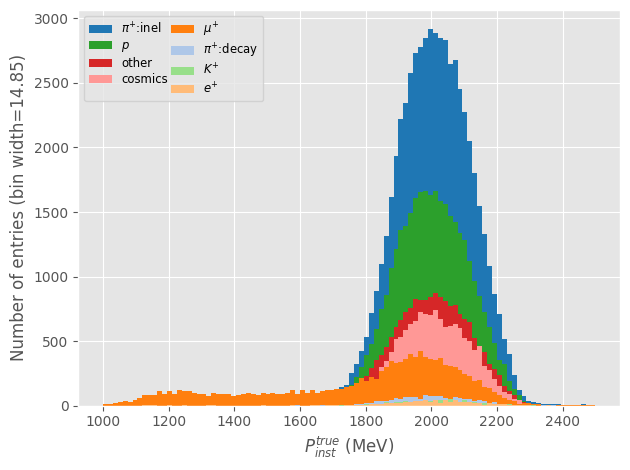

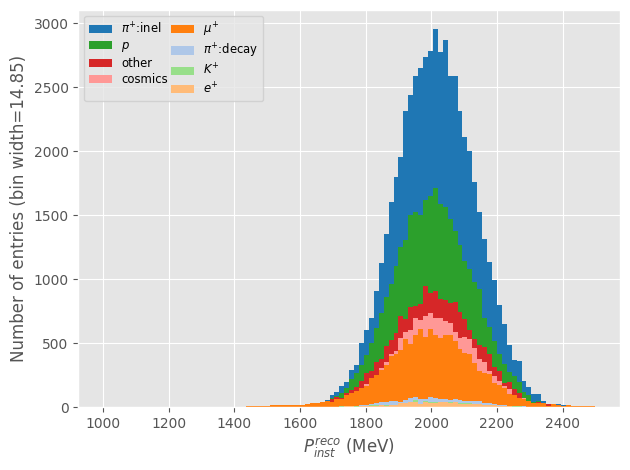

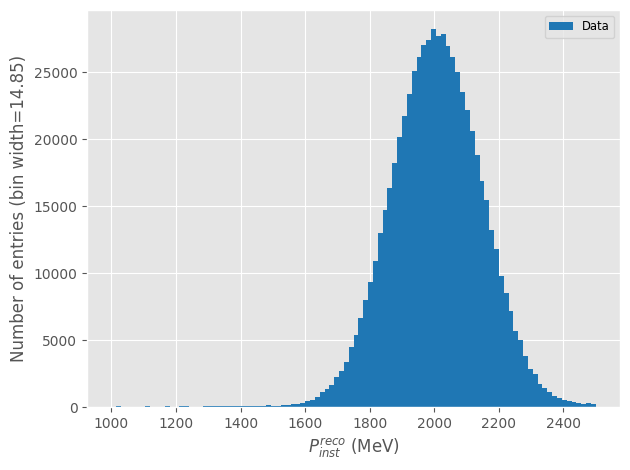

In [4]:
with Plots.PlotBook("2GeV_beam_momenta_profile.pdf", False) as book:
    Plots.PlotTagged(vector.magnitude(samples_pion["mc"].trueParticles.momentum[:, 0]), Tags.GenerateTrueBeamParticleTags(samples_pion["mc"]), y_scale = "linear", stacked = False, reverse_sort = True, x_range = args_pion.P_inst_range, x_label = "$P_{inst}^{true}$ (MeV)", loc = "upper left")
    book.Save()
    Plots.PlotTagged(samples_pion["mc"].recoParticles.beam_inst_P, Tags.GenerateTrueBeamParticleTags(samples_pion["mc"]), y_scale = "linear", stacked = False, reverse_sort = True, x_range = args_pion.P_inst_range, x_label = "$P_{inst}^{reco}$ (MeV)", loc = "upper left")
    book.Save()
    Plots.PlotHist(samples_pion["data"].recoParticles.beam_inst_P, range = args_pion.P_inst_range, xlabel = "$P_{inst}^{reco}$ (MeV)", label = "Data")
    book.Save()

# Sidebands

## Muons

In [10]:
sideband_mc = (
          args_pion.selection_masks["mc"]["beam"]["PiBeamSelection"]
        & args_pion.selection_masks["mc"]["beam"]["PandoraTagCut"]
        & args_pion.selection_masks["mc"]["beam"]["CaloSizeCut"]
        & args_pion.selection_masks["mc"]["beam"]["DxyCut"]
        & args_pion.selection_masks["mc"]["beam"]["DzCut"]
        & args_pion.selection_masks["mc"]["beam"]["CosThetaCut"]
        & ~args_pion.selection_masks["mc"]["beam"]["APA3Cut"]
        & args_pion.selection_masks["mc"]["beam"]["HasFinalStatePFOsCut"])

sideband_data = (
        args_pion.selection_masks["data"]["beam"]["PiBeamSelection"]
        & args_pion.selection_masks["data"]["beam"]["PandoraTagCut"]
        & args_pion.selection_masks["data"]["beam"]["CaloSizeCut"]
        & args_pion.selection_masks["data"]["beam"]["DxyCut"]
        & args_pion.selection_masks["data"]["beam"]["DzCut"]
        & args_pion.selection_masks["data"]["beam"]["CosThetaCut"]
        & ~args_pion.selection_masks["data"]["beam"]["APA3Cut"]
        & args_pion.selection_masks["data"]["beam"]["HasFinalStatePFOsCut"])

muons = {
    "mc" : samples_pion["mc"].Filter([sideband_mc], [sideband_mc], True),
    "data" : samples_pion["data"].Filter([sideband_data], [sideband_data], True)
}

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")


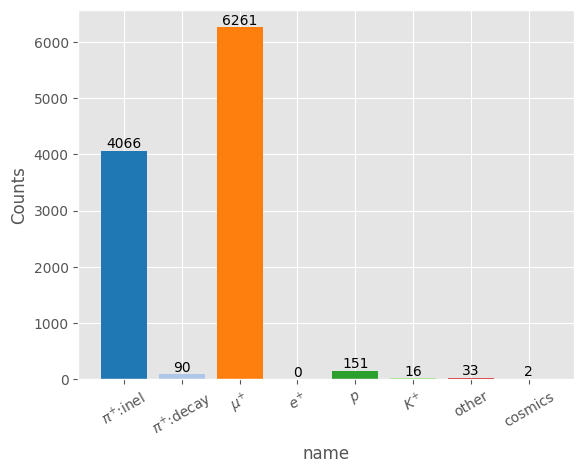

In [11]:
Plots.PlotTags(Tags.GenerateTrueBeamParticleTags(muons["mc"]))

In [ ]:
reco_fractional_range = cex_beam_reweight.RecoFractionalRange(muons["mc"], cross_section.Particle.from_pdgid(-13), args_stopping_muon)
reco_fractional_range_data = cex_beam_reweight.RecoFractionalRange(muons["data"], cross_section.Particle.from_pdgid(-13), args_stopping_muon)

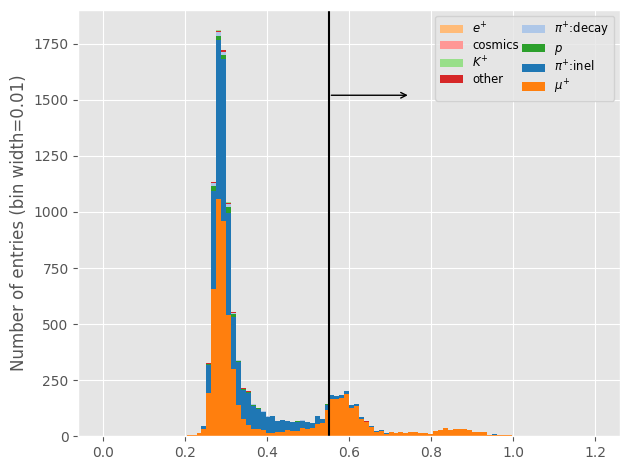

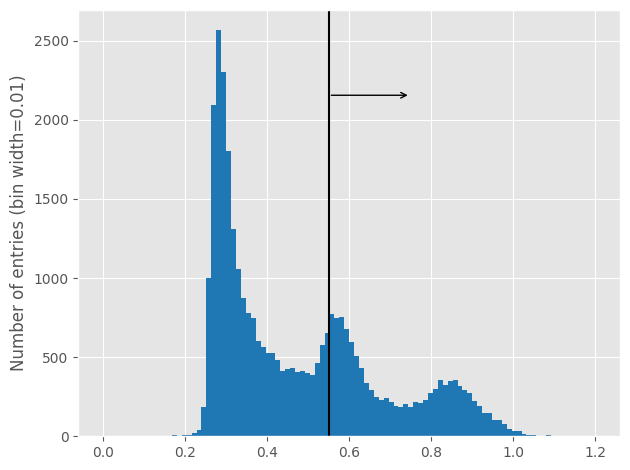

In [20]:
Plots.PlotTagged(reco_fractional_range, Tags.GenerateTrueBeamParticleTags(muons["mc"]), x_range = [0, 1.2], y_scale = "linear")
Plots.DrawMultiCutPosition(0.55, face = ">")

Plots.PlotHist(reco_fractional_range_data, range = [0, 1.2])
Plots.DrawMultiCutPosition(0.55, face = ">")

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__number.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_inst_P.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_calo_pos.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_track_length.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Docume

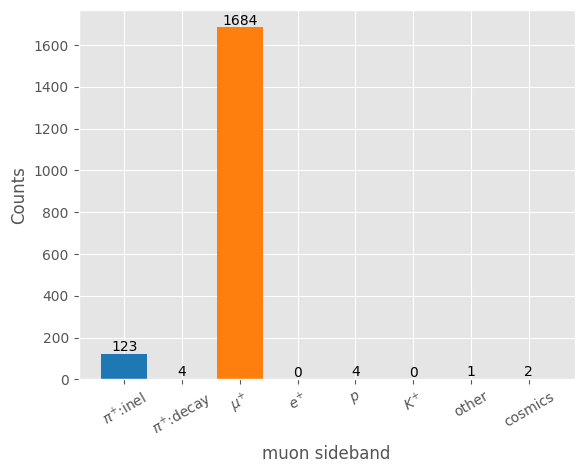

In [29]:
range_mask = {"mc" : reco_fractional_range > 0.55, "data" : reco_fractional_range_data > 0.55}
muons = {k : v.Filter([range_mask[k]], [range_mask[k]], True) for k, v in muons.items()}

pdf muon_sideband.pdf has been opened
pdf muon_sideband.pdf has been closed


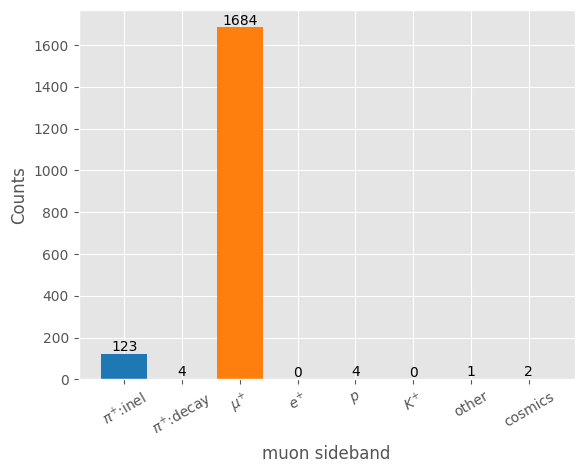

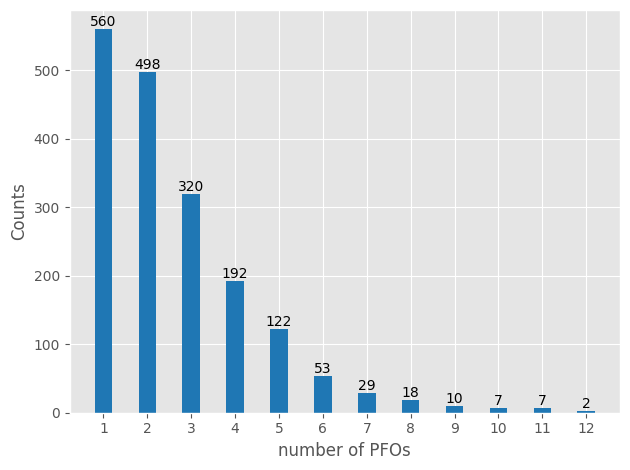

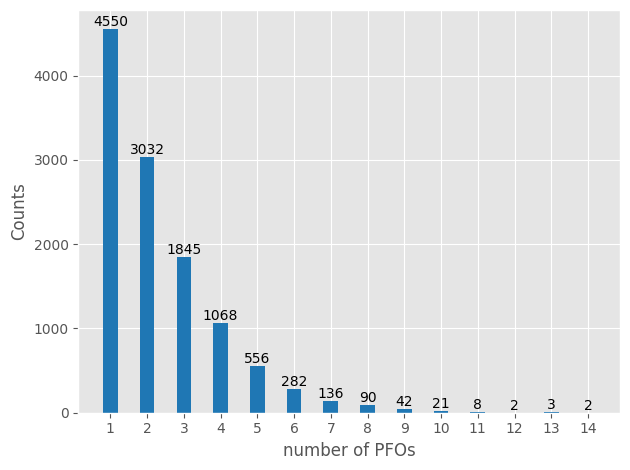

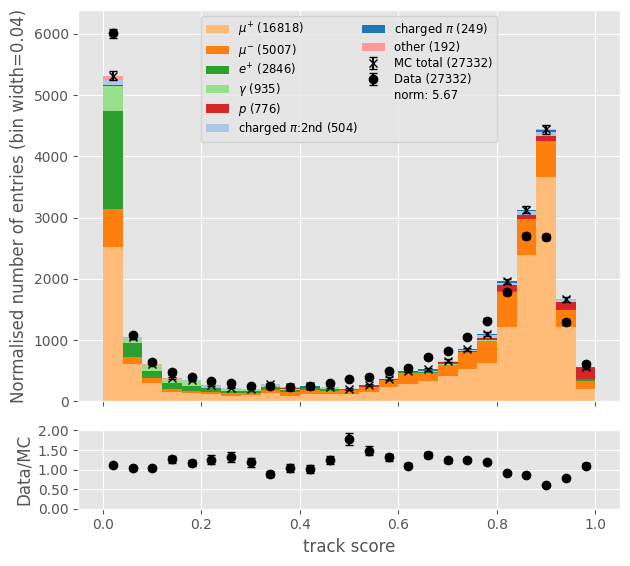

In [32]:
with Plots.PlotBook("muon_sideband.pdf", True) as book:
    Plots.PlotTags(Tags.GenerateTrueBeamParticleTags(muons["mc"]), xlabel = "muon sideband")
    book.Save()
    Plots.PlotBar(ak.num(muons["mc"].recoParticles.number), xlabel = "number of PFOs")
    book.Save()
    Plots.PlotBar(ak.num(muons["data"].recoParticles.number), xlabel = "number of PFOs")
    book.Save()
    Plots.PlotTagged(muons["mc"].recoParticles.track_score, Tags.GenerateTrueParticleTagsPiPlus(muons["mc"]), data2 = muons["data"].recoParticles.track_score, x_range = [0, 1], bins = 25, norm = True, x_label = "track score")
    book.Save()


## Protons

In [17]:
book = Plots.PlotBook("1GeV_proton_selection.pdf", False)

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1285: RuntimeWarning: divide by zero encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1285: RuntimeWarning: invalid value encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1286: RuntimeWarning: invalid value encountered in divide
  ra

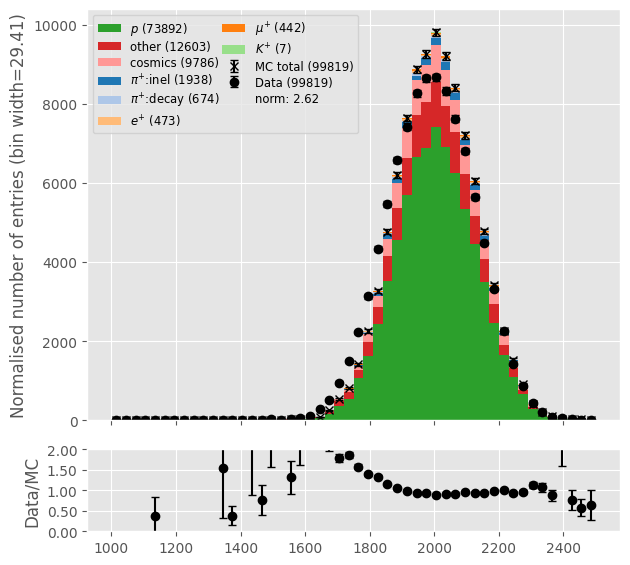

In [18]:
proton_mask = {"mc" : cross_section.BeamParticleSelection.BeamTriggerSelection(samples_pion["mc"], [2212], False), "data" : cross_section.BeamParticleSelection.BeamTriggerSelection(samples_pion["data"], [2212], True)}
proton_sample  = {k : v.Filter([proton_mask[k]],[proton_mask[k]], returnCopy = True) for k, v in samples_pion.items()}
Plots.PlotTagged(proton_sample["mc"].recoParticles.beam_inst_P, cross_section.Tags.GenerateTrueBeamParticleTags(proton_sample["mc"]), data2 = proton_sample["data"].recoParticles.beam_inst_P, x_range = args_pion.P_inst_range, bins = 50, norm = True)
book.Save()

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:888: UserWarning: pdf has not been opened.
  warnings.warn("pdf has not been opened.")


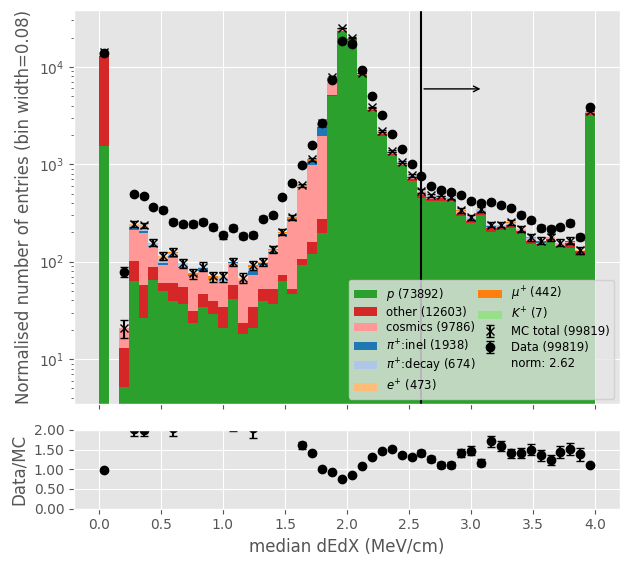

In [19]:
Plots.PlotTagged(cross_section.BeamParticleSelection.Median(proton_sample["mc"].recoParticles.beam_dEdX), Tags.GenerateTrueBeamParticleTags(proton_sample["mc"]), data2 = cross_section.BeamParticleSelection.Median(proton_sample["data"].recoParticles.beam_dEdX), x_range = [0, 4], y_scale = "log", truncate = True, x_label = "median dEdX (MeV/cm)", norm = True, bins = 50)
Plots.DrawMultiCutPosition(2.6, face = ">", arrow_length = 0.5)
book.Save()
book.close()

In [7]:
proton_mask = {k : cross_section.BeamParticleSelection.Median(v.recoParticles.beam_dEdX) > 2.6 for k, v in proton_sample.items()}
proton_sample  = {k : v.Filter([proton_mask[k]],[proton_mask[k]], returnCopy = True) for k, v in proton_sample.items()}


/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")


In [8]:
proton_mask = {k : cross_section.BeamParticleSelection.HasFinalStatePFOsCut(v) for k, v in proton_sample.items()}
proton_sample = {k : v.Filter([proton_mask[k]], [proton_mask[k]], returnCopy = True) for k, v in proton_sample.items()}

proton_sample = {k : v.Filter([cross_section.PFOSelection.GoodShowerSelection(v)], returnCopy = True) for k, v in proton_sample.items()}

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_inst_P.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_dEdX.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _TrueParticleDataBT__beam_pdg.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _TrueParticleDataBT__beam_endProcess.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _TrueParticleDataBT__beam_origin.
  warnings.warn(f"Couldn't apply filters to {var

In [9]:
proton_sample["mc"].recoParticles.LoadData("beam_track_score", "reco_beam_PFP_trackScore", False)
proton_sample["data"].recoParticles.LoadData("beam_track_score", "reco_beam_PFP_trackScore", False)

pdf 1GeV_proton_sideband.pdf has been opened
pdf 1GeV_proton_sideband.pdf has been closed


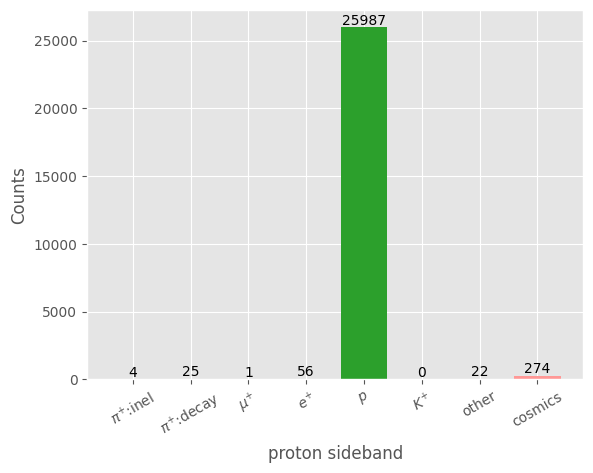

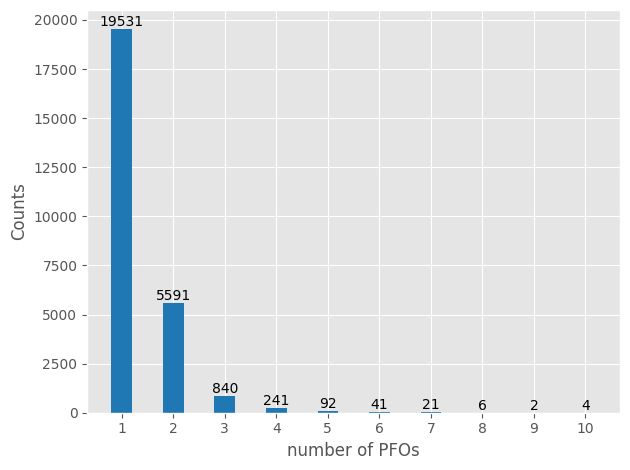

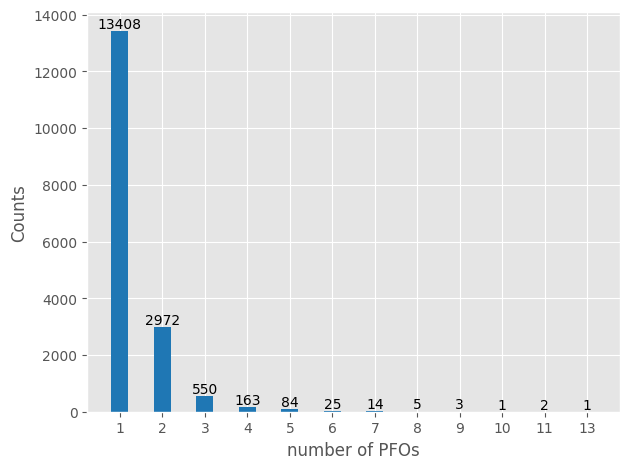

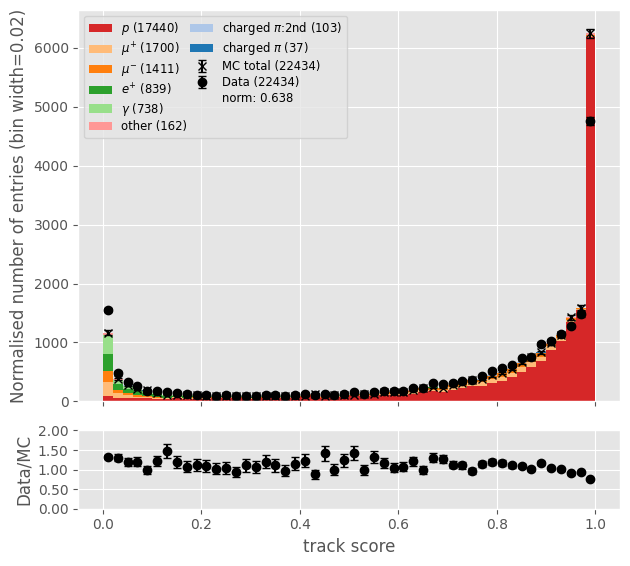

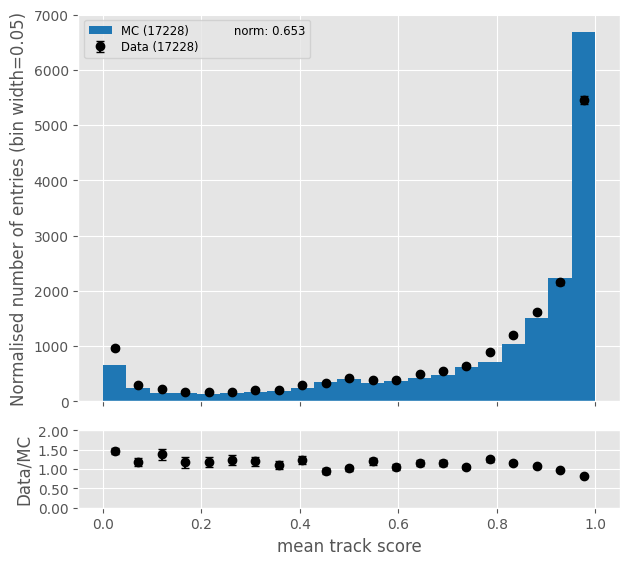

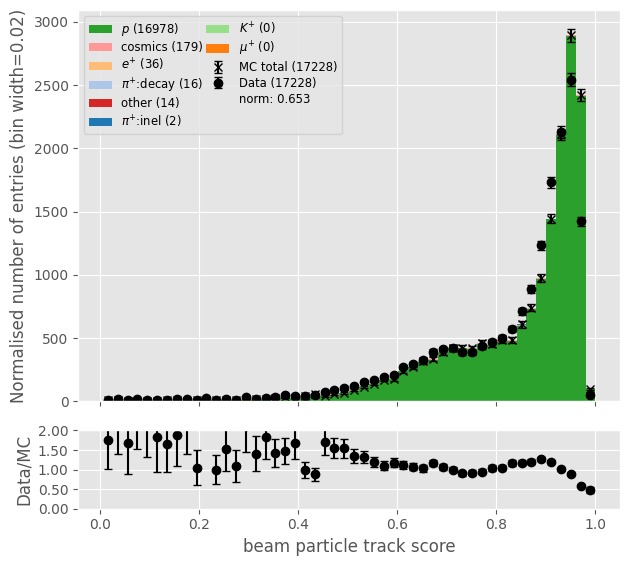

In [10]:
with Plots.PlotBook("1GeV_proton_sideband.pdf", True) as book:
    Plots.PlotTags(Tags.GenerateTrueBeamParticleTags(proton_sample["mc"]), xlabel = "proton sideband")
    book.Save()
    Plots.PlotBar(ak.num(proton_sample["mc"].recoParticles.number), xlabel = "number of PFOs")
    book.Save()
    Plots.PlotBar(ak.num(proton_sample["data"].recoParticles.number), xlabel = "number of PFOs")
    book.Save()
    Plots.PlotTagged(proton_sample["mc"].recoParticles.track_score, Tags.GenerateTrueParticleTagsPiPlus(proton_sample["mc"]), data2 = proton_sample["data"].recoParticles.track_score, x_range = [0, 1], bins = 50, norm = True, x_label = "track score")
    book.Save()
    Plots.PlotHistDataMC(ak.mean(proton_sample["data"].recoParticles.track_score, axis = -1), ak.mean(proton_sample["mc"].recoParticles.track_score, axis = -1), x_range = [0, 1], bins = 21, norm = True, xlabel = "mean track score")
    book.Save()
    Plots.PlotTagged(proton_sample["mc"].recoParticles._RecoParticleData__beam_track_score, Tags.GenerateTrueBeamParticleTags(proton_sample["mc"]), data2 = proton_sample["data"].recoParticles._RecoParticleData__beam_track_score, norm = True, bins = 50, x_label = "beam particle track score")
    book.Save()


## mean track score reweight

In [11]:
def MeanTrackScoreWeights(mc : Master.Data, func : cross_section.Fitting.FitFunction, params : list, truncate : int = 10):
    weights = 1/func(ak.mean(mc.recoParticles.track_score, axis = -1), *params)
    weights = np.where(weights > truncate, truncate, weights)
    return weights

pdf 1GeV_mean_track_score_reweight.pdf has been opened
pdf 1GeV_mean_track_score_reweight.pdf has been closed


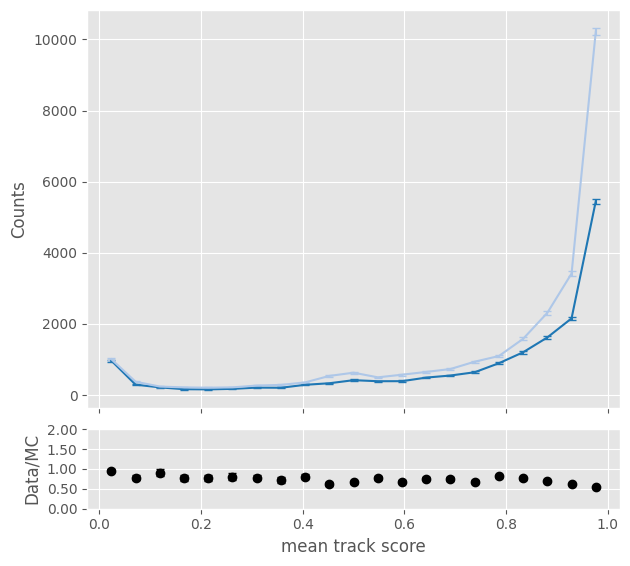

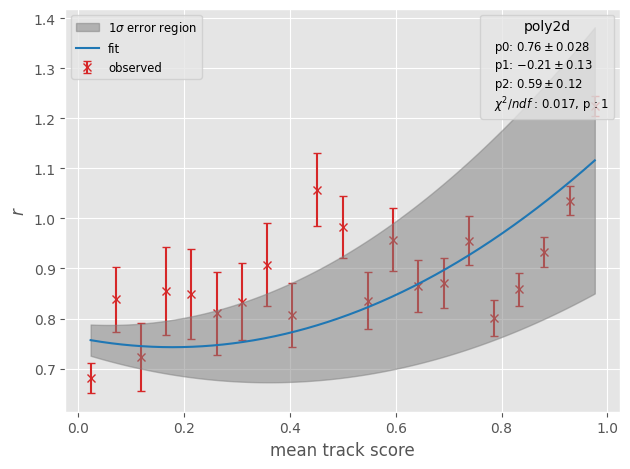

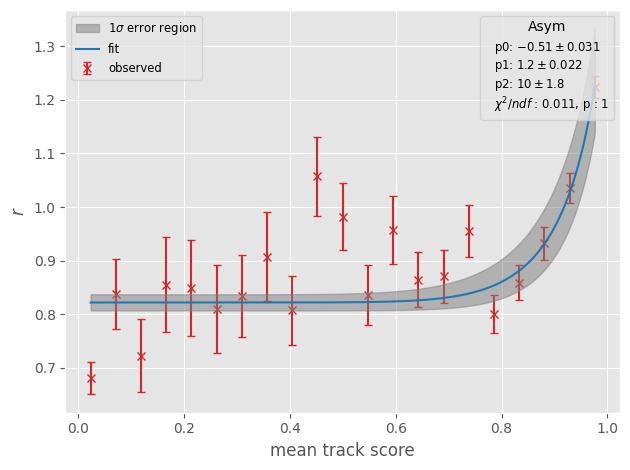

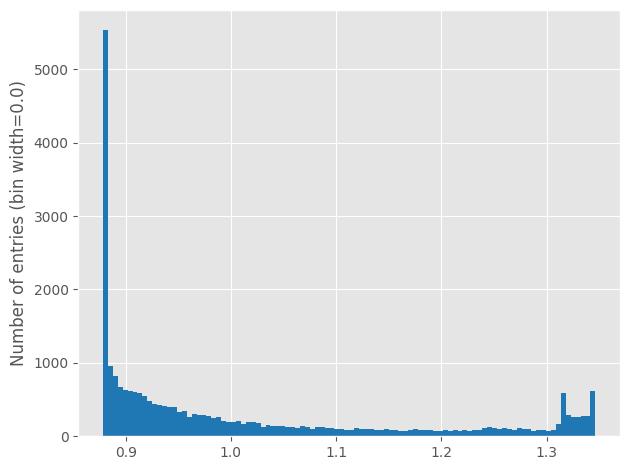

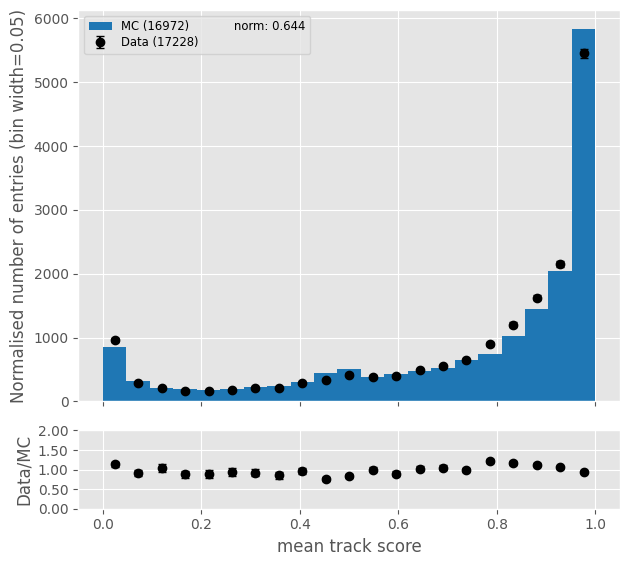

In [19]:
with Plots.PlotBook("1GeV_mean_track_score_reweight", True) as book:
    s_mc, edges = np.histogram(np.array(ak.mean(proton_sample["mc"].recoParticles.track_score, axis = -1)), 21, [0, 1])
    s_data = np.histogram(np.array(ak.mean(proton_sample["data"].recoParticles.track_score, axis = -1)), 21, [0, 1])[0]

    with Plots.RatioPlot((edges[1:] + edges[:-1]) / 2, s_data, s_mc, np.sqrt(s_data), np.sqrt(s_mc), "mean track score", "Data/MC") as ratio_plot:
        Plots.Plot(ratio_plot.x, ratio_plot.y1, yerr = ratio_plot.y1_err, newFigure = False)
        Plots.Plot(ratio_plot.x, ratio_plot.y2, yerr = ratio_plot.y2_err, newFigure = False, ylabel = "Counts")
    book.Save()
    scale = sum(ratio_plot.y1) / sum(ratio_plot.y2)
    ratio = scale * np.nan_to_num(ratio_plot.y2/ratio_plot.y1, posinf = 0)
    ratio_err = np.nan_to_num(abs(ratio * np.sqrt((ratio_plot.y1_err/ratio_plot.y1)**2 + (ratio_plot.y2_err/ratio_plot.y2)**2)))

    Plots.plt.figure()
    fit_result_poly2d = cross_section.Fitting.Fit(ratio_plot.x, ratio, ratio_err, cross_section.Fitting.poly2d, plot = True, xlabel = "mean track score", ylabel = "$r$")
    book.Save()

    Plots.plt.figure()
    fit_result_asym = cross_section.Fitting.Fit(ratio_plot.x, ratio, ratio_err, Asym, plot = True, xlabel = "mean track score", ylabel = "$r$")
    book.Save()

    weights = np.array(MeanTrackScoreWeights(proton_sample["mc"], cross_section.Fitting.poly2d, fit_result_poly2d[0]))
    Plots.PlotHist(weights)
    book.Save()

    Plots.PlotHistDataMC(ak.mean(proton_sample["data"].recoParticles.track_score, axis = -1), ak.mean(proton_sample["mc"].recoParticles.track_score, axis = -1), x_range = [0, 1], bins = 21, norm = True, xlabel = "mean track score", mc_weights = weights)
    book.Save()


In [16]:
print(f"{sum(weights)=}")
print(f"{len(weights)=}")

sum(weights)=26765.220556419827
len(weights)=26369


In [18]:
cross_section.SaveConfiguration("test/1GeV_track_score_reweight_params.json", {f"p{i}" : {"value" : fit_result_poly2d[0][i], "error" : fit_result_poly2d[1][i]} for i in range(cross_section.Fitting.poly2d.n_params)})


## Pion

In [4]:
# stopping_muon_sample = {k : v.Filter(returnCopy = True) for k, v in samples_stopping_muon.items()}
pion_sample = {k : v.Filter(returnCopy = True) for k, v in samples_pion.items()}

In [5]:
# stopping_muon_sample = {k : BeamPionSelection(v, args_stopping_muon, k == "mc") for k, v in stopping_muon_sample.items()}
pion_sample = {k : BeamPionSelection(v, args_pion, k == "mc") for k, v in pion_sample.items()} 

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to event_index.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to eventNum.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply f

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1282: RuntimeWarning: divide by zero encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1283: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((data_err/h_data)**2 + (mc_error/h_mc)**2)
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1282: RuntimeWarning: inv

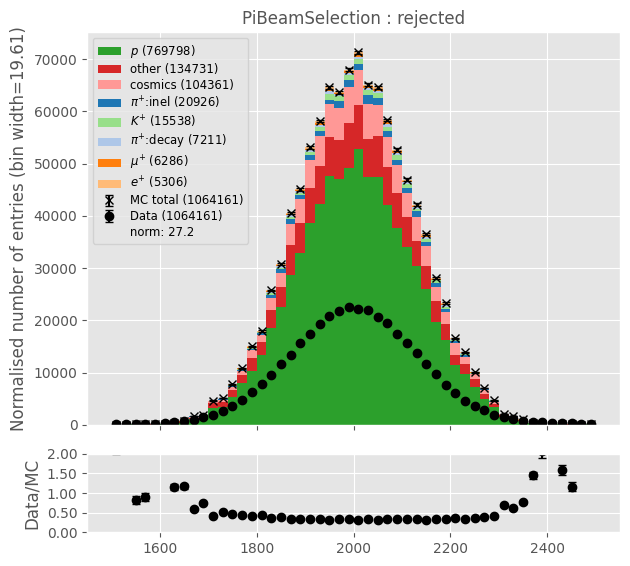

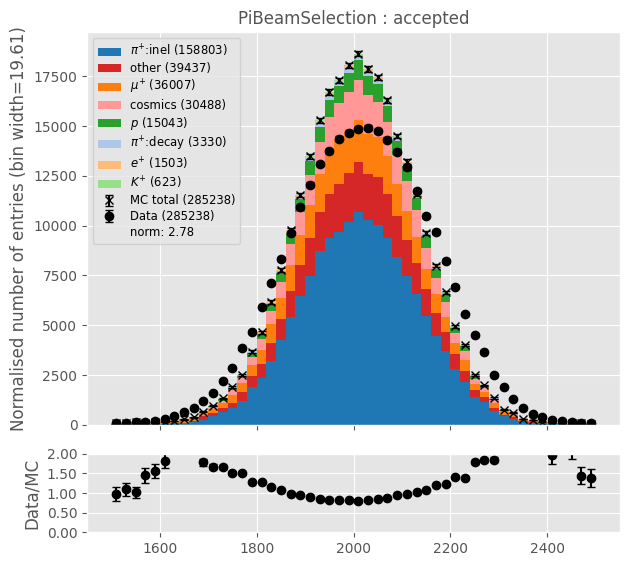

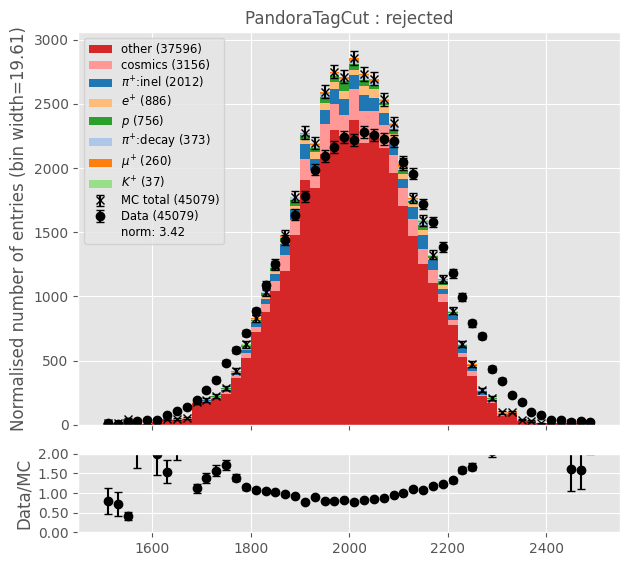

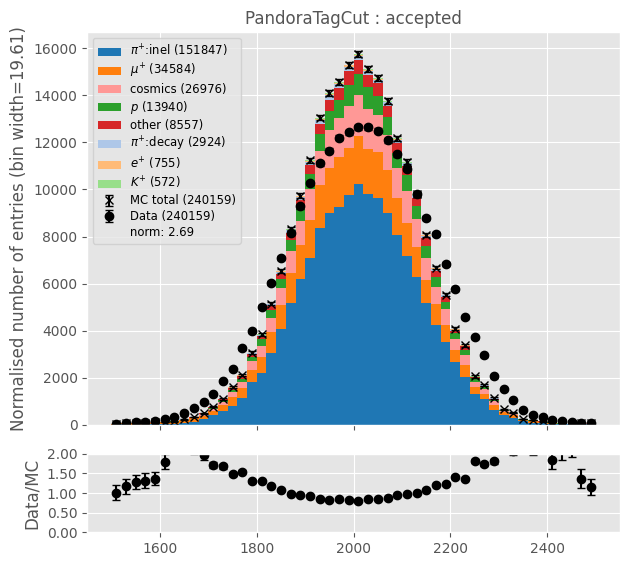

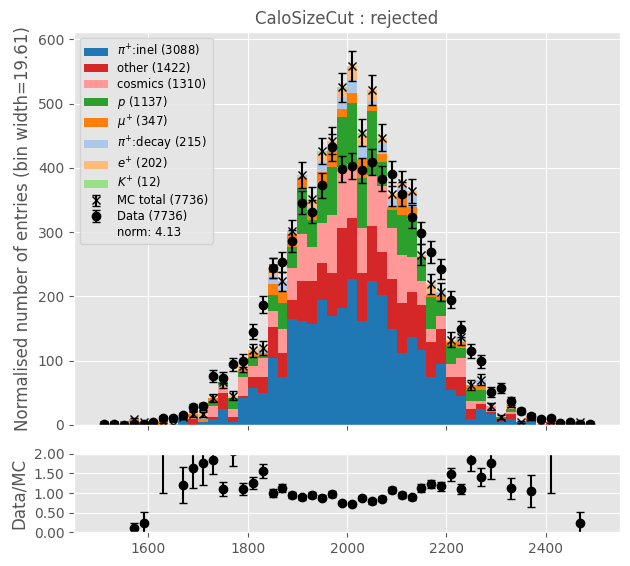

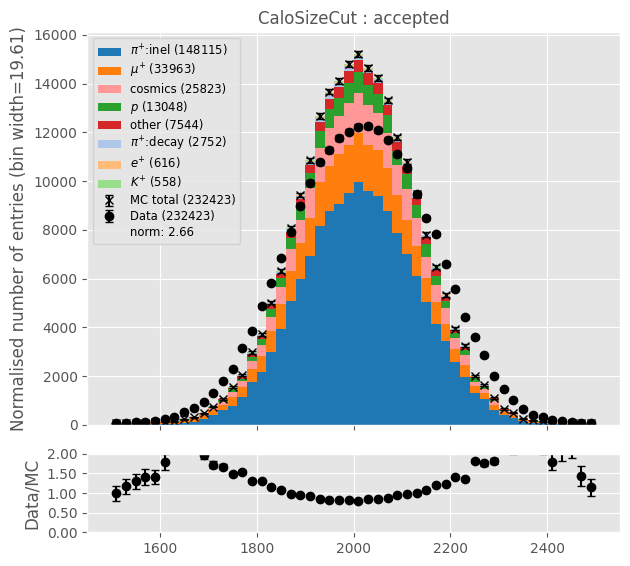

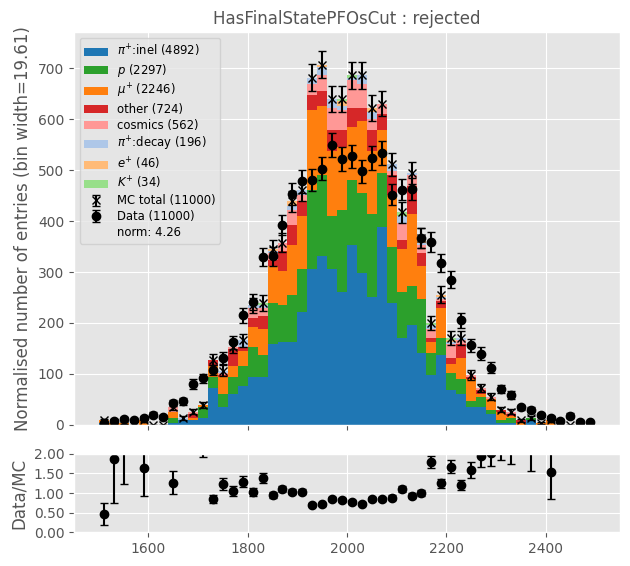

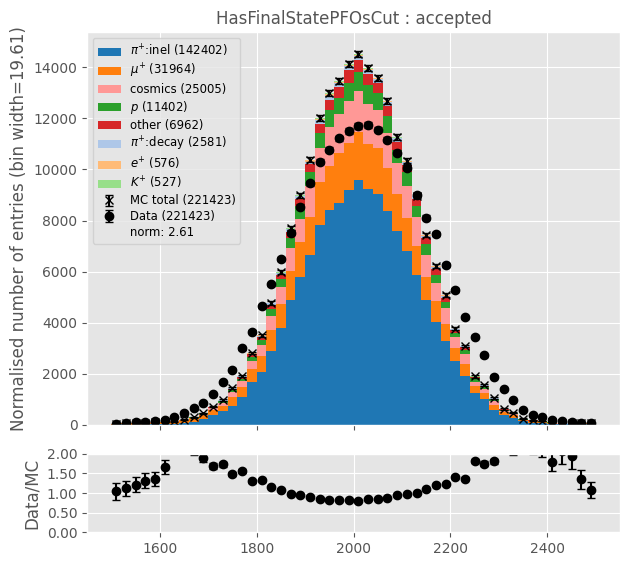

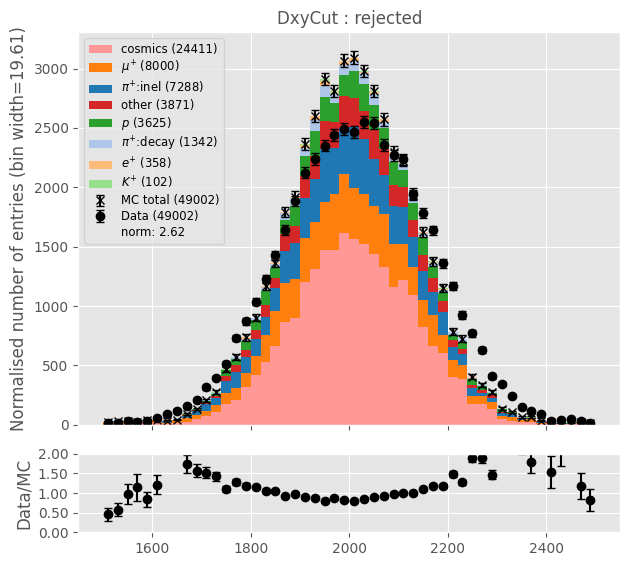

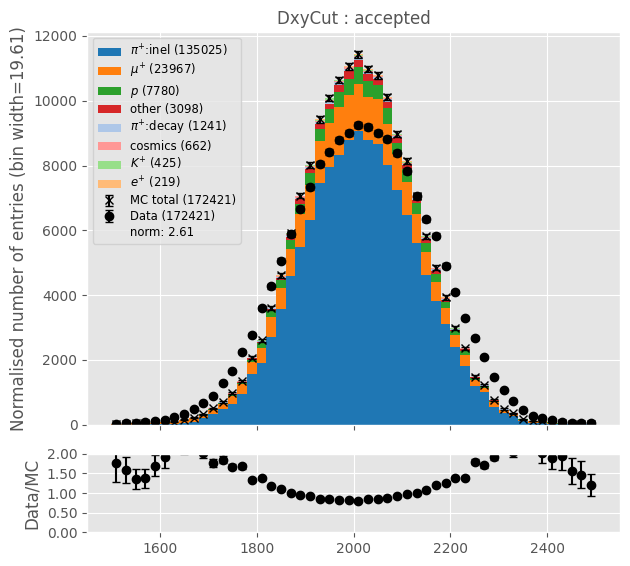

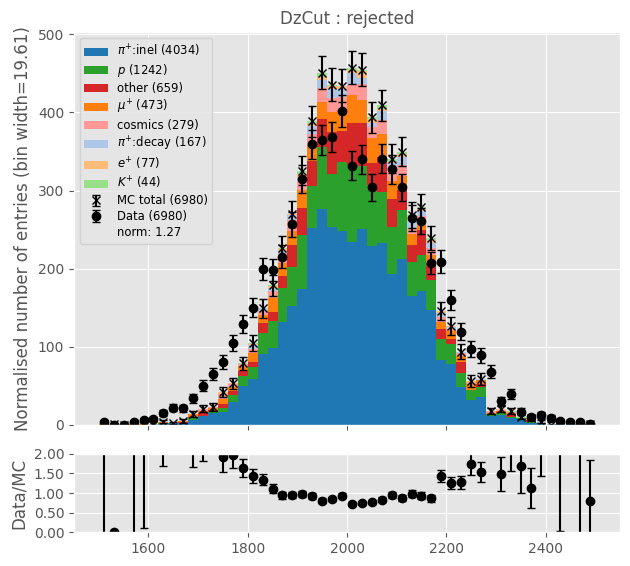

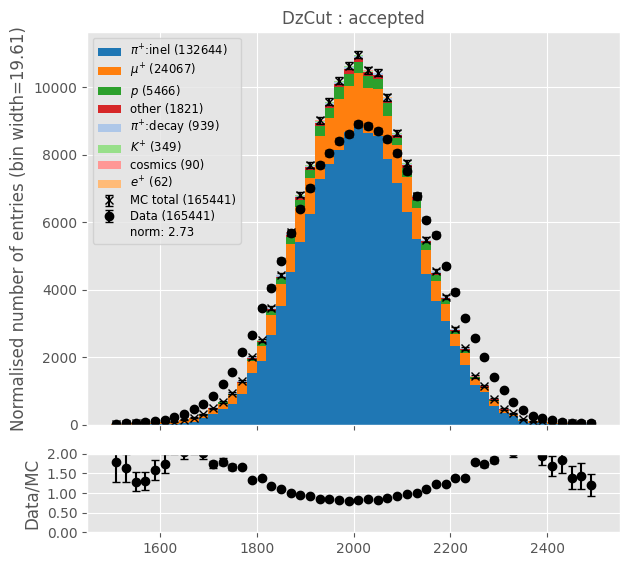

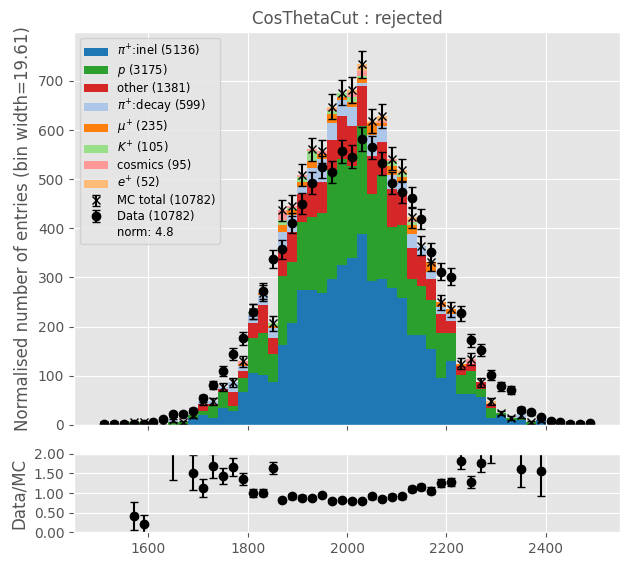

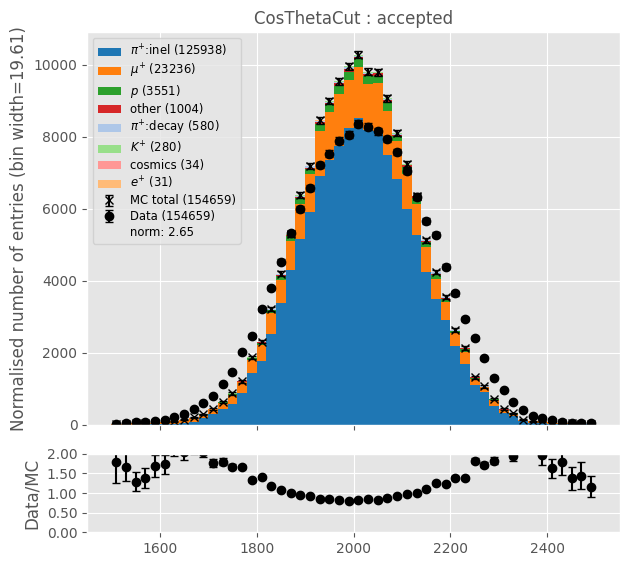

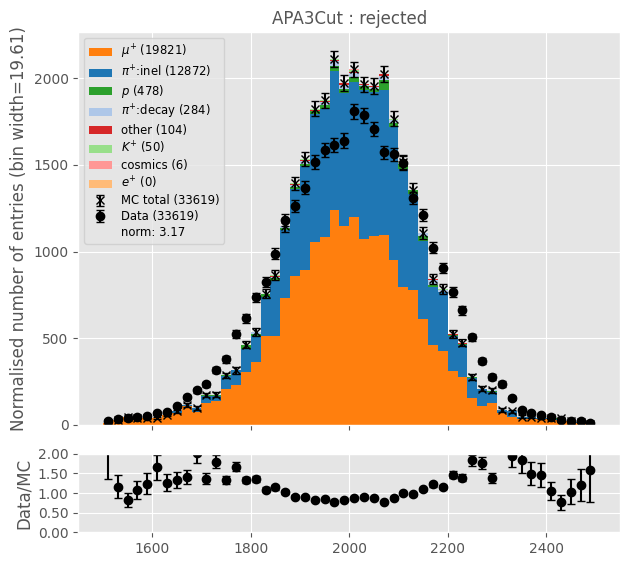

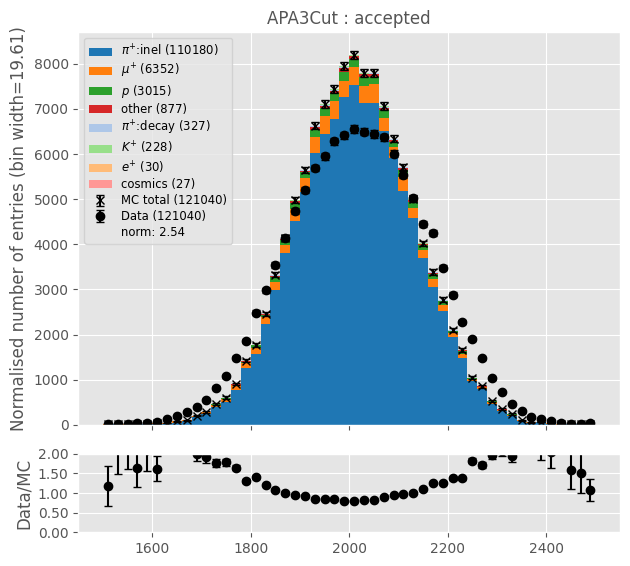

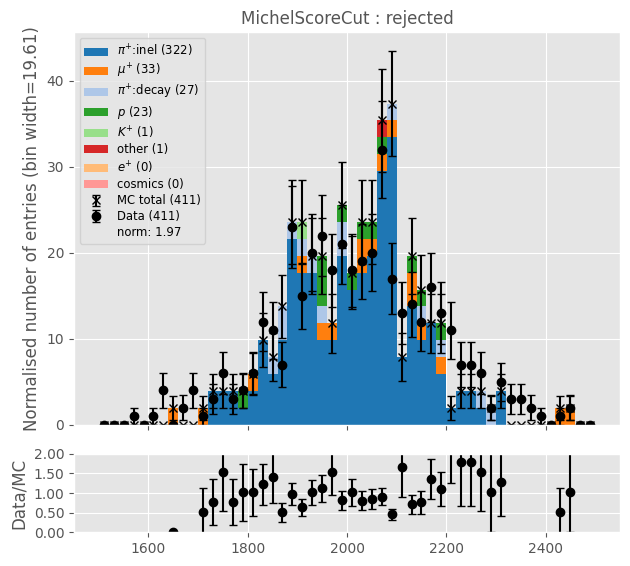

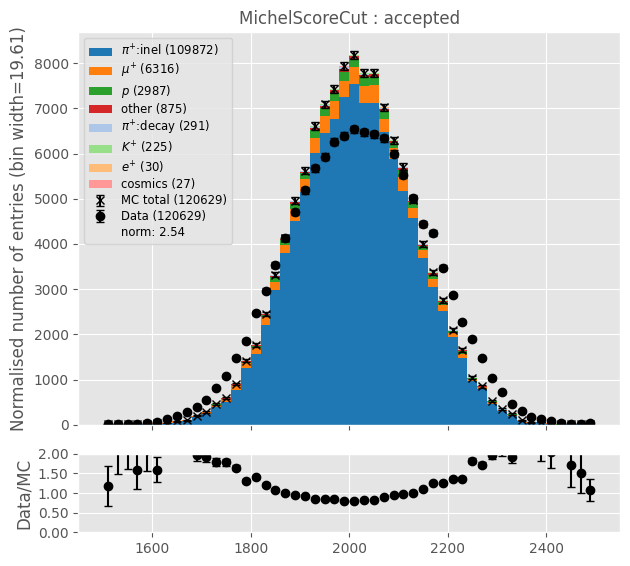

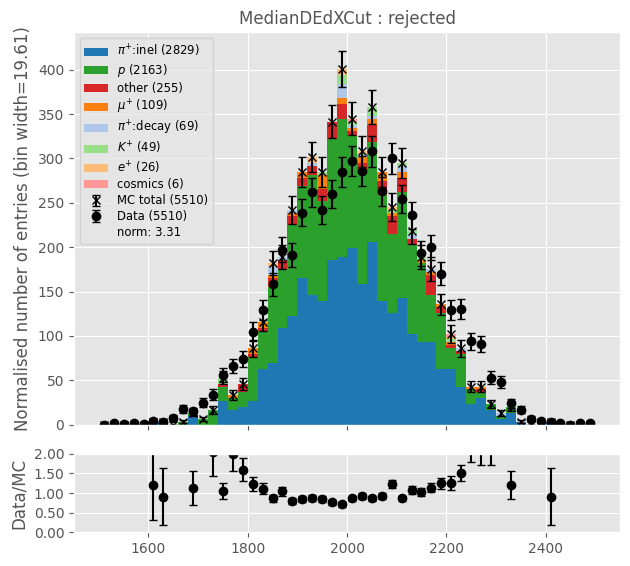

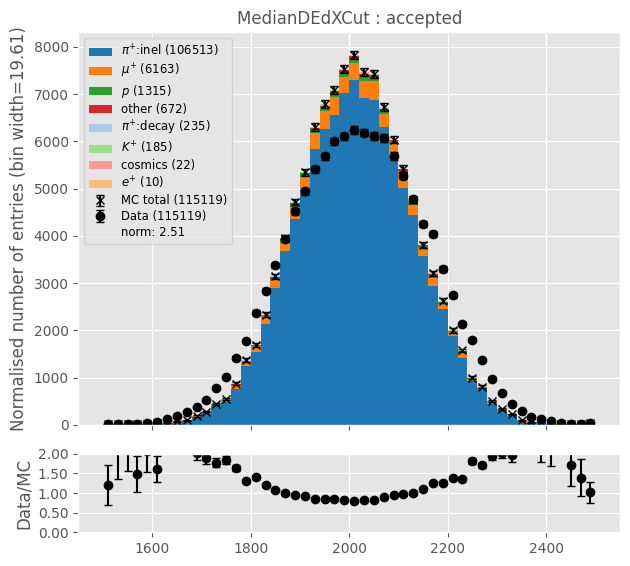

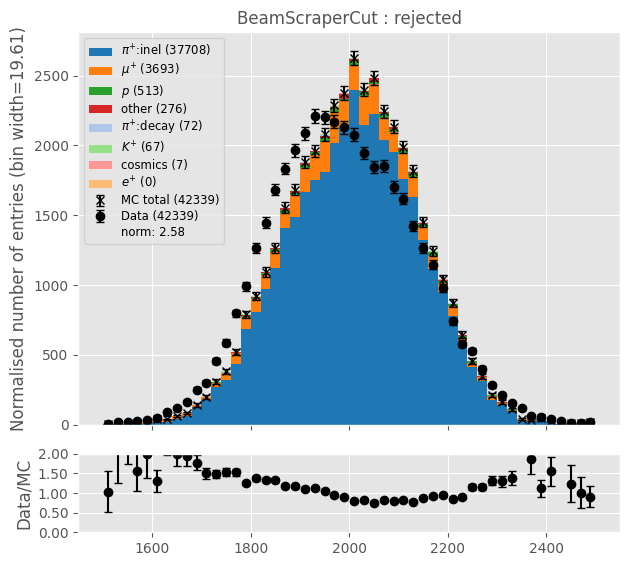

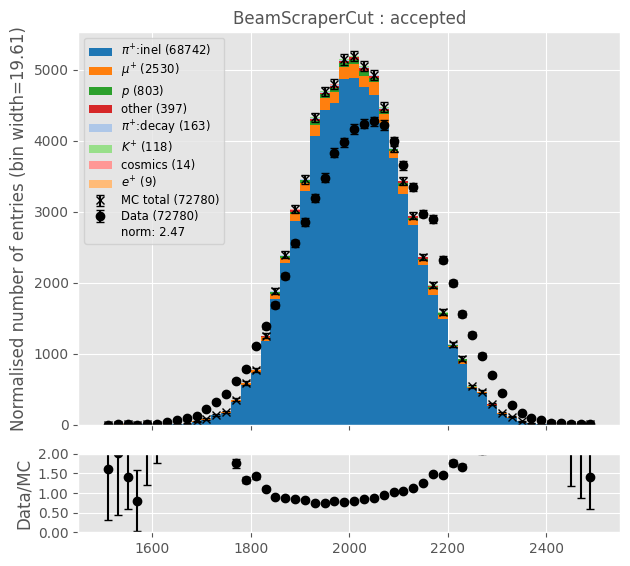

In [5]:
selection_mask = {k : np.ones(len(v.eventNum), dtype = bool) for k, v in samples_pion.items()}
rejection_mask = {k : np.ones(len(v.eventNum), dtype = bool) for k, v in samples_pion.items()}


for s, d, m in zip(args_pion.selection_masks["mc"]["beam"].keys(), args_pion.selection_masks["data"]["beam"].values(), args_pion.selection_masks["mc"]["beam"].values()):
    rejection_mask["data"] = selection_mask["data"] & ~d
    rejection_mask["mc"] = selection_mask["mc"] & ~m

    selection_mask["data"] = selection_mask["data"] & d
    selection_mask["mc"] = selection_mask["mc"] & m

    samples_pion_selection = {k : v.Filter([rejection_mask[k]], [rejection_mask[k]], returnCopy = True) for k, v in samples_pion.items()}
    Plots.PlotTagged(samples_pion_selection["mc"].recoParticles.beam_inst_P, cross_section.Tags.GenerateTrueBeamParticleTags(samples_pion_selection["mc"]), data2 = samples_pion_selection["data"].recoParticles.beam_inst_P, x_range = [1500, 2500], norm = True, loc = "upper left", bins = 50, ncols = 1, title = f"{s} : rejected")

    samples_pion_selection = {k : v.Filter([selection_mask[k]], [selection_mask[k]], returnCopy = True) for k, v in samples_pion.items()}
    Plots.PlotTagged(samples_pion_selection["mc"].recoParticles.beam_inst_P, cross_section.Tags.GenerateTrueBeamParticleTags(samples_pion_selection["mc"]), data2 = samples_pion_selection["data"].recoParticles.beam_inst_P, x_range = [1500, 2500], norm = True, loc = "upper left", bins = 50, ncols = 1, title = f"{s} : accepted")

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1285: RuntimeWarning: divide by zero encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1285: RuntimeWarning: invalid value encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1286: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((data_err/h_data)**2 + (mc_error/h_mc)**2)


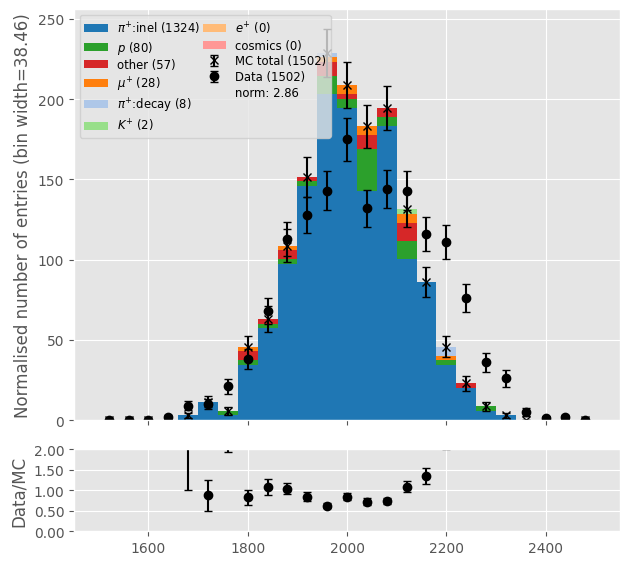

In [6]:
# proton_selection = ProtonBeamSelection(samples_pion["mc"], False)
# protons_mc = (~args_pion.selection_masks["mc"]["beam"]["PiBeamSelection"]
#         & args_pion.selection_masks["mc"]["beam"]["PandoraTagCut"]
#         & args_pion.selection_masks["mc"]["beam"]["CaloSizeCut"]
#         & cross_section.BeamParticleSelection.MedianDEdXCut(samples_pion["mc"], cut = 1.85, op = ">")
#         )

# protons_data = (~args_pion.selection_masks["data"]["beam"]["PiBeamSelection"]
#         & args_pion.selection_masks["data"]["beam"]["PandoraTagCut"]
#         & args_pion.selection_masks["data"]["beam"]["CaloSizeCut"]
#         & cross_section.BeamParticleSelection.MedianDEdXCut(samples_pion["data"], cut = 1.85, op = ">"))


sideband_mc = (
          args_pion.selection_masks["mc"]["beam"]["PiBeamSelection"]
        & args_pion.selection_masks["mc"]["beam"]["PandoraTagCut"]
        & args_pion.selection_masks["mc"]["beam"]["CaloSizeCut"]
        & args_pion.selection_masks["mc"]["beam"]["DxyCut"]
        & args_pion.selection_masks["mc"]["beam"]["DzCut"]
        & args_pion.selection_masks["mc"]["beam"]["CosThetaCut"]
        & args_pion.selection_masks["mc"]["beam"]["APA3Cut"]
        & args_pion.selection_masks["mc"]["beam"]["MichelScoreCut"]
        & args_pion.selection_masks["mc"]["beam"]["MedianDEdXCut"]
        & args_pion.selection_masks["mc"]["beam"]["BeamScraperCut"]
        & ~args_pion.selection_masks["mc"]["beam"]["HasFinalStatePFOsCut"])


sideband_data = (
        args_pion.selection_masks["data"]["beam"]["PiBeamSelection"]
        & args_pion.selection_masks["data"]["beam"]["PandoraTagCut"]
        & args_pion.selection_masks["data"]["beam"]["CaloSizeCut"]
        & args_pion.selection_masks["data"]["beam"]["DxyCut"]
        & args_pion.selection_masks["data"]["beam"]["DzCut"]
        & args_pion.selection_masks["data"]["beam"]["CosThetaCut"]
        & args_pion.selection_masks["data"]["beam"]["APA3Cut"]
        & args_pion.selection_masks["data"]["beam"]["MichelScoreCut"]
        & args_pion.selection_masks["data"]["beam"]["MedianDEdXCut"]
        & args_pion.selection_masks["data"]["beam"]["BeamScraperCut"]
        & ~args_pion.selection_masks["data"]["beam"]["HasFinalStatePFOsCut"])

sideband_selection = {"data" : sideband_data, "mc" : sideband_mc}

Plots.PlotTagged(samples_pion["mc"].recoParticles.beam_inst_P[sideband_mc], cross_section.Tags.GenerateTrueBeamParticleTags(samples_pion["mc"].Filter([sideband_mc], [sideband_mc], returnCopy = True)), data2 = samples_pion["data"].recoParticles.beam_inst_P[sideband_data], x_range = [args_pion.beam_momentum * 0.75, args_pion.beam_momentum * 1.25], norm = True, bins = 25)
# Plots.PlotTagged(cross_section.BeamParticleSelection.Median(samples_pion["mc"].recoParticles.beam_dEdX[cosmics]), cross_section.Tags.GenerateTrueBeamParticleTags(samples_pion["mc"].Filter([cosmics], [cosmics], returnCopy = True)), x_range = [1.5, 3], norm = True)


# print(sum(cosmics))


# ratio reweight

In [34]:
def ReWeight(sample : dict[Master.Data], p_nominal : float, bins : int = 10, p_range : np.array = np.array([0.75, 1.25]), book : Plots.PlotBook = Plots.PlotBook.null):
    p_mc, edges = np.histogram(np.array(sample["mc"].recoParticles.beam_inst_P), bins, range = p_nominal * p_range)
    p_data = np.histogram(np.array(sample["data"].recoParticles.beam_inst_P), bins, range = p_nominal * p_range)[0]

    with Plots.RatioPlot((edges[1:] + edges[:-1]) / 2, p_data, p_mc, np.sqrt(p_data), np.sqrt(p_mc), "$P_{inst}^{reco}$ (MeV)", "Data/MC") as ratio_plot:
        Plots.Plot(ratio_plot.x, ratio_plot.y1, yerr = ratio_plot.y1_err, newFigure = False)
        Plots.Plot(ratio_plot.x, ratio_plot.y2, yerr = ratio_plot.y2_err, newFigure = False, ylabel = "Counts")
    book.Save()

    scale = sum(ratio_plot.y1) / sum(ratio_plot.y2)

    ratio = scale * np.nan_to_num(ratio_plot.y2/ratio_plot.y1, posinf = 0)
    ratio_err = np.nan_to_num(abs(ratio * np.sqrt((ratio_plot.y1_err/ratio_plot.y1)**2 + (ratio_plot.y2_err/ratio_plot.y2)**2)))

    # r = "$\\frac{R N_{mc}}{N_{data}}$"
    Plots.Plot(ratio_plot.x, ratio, yerr = ratio_err, xlabel = "$P_{inst}^{reco}$ (MeV)", ylabel = "$r$")
    book.Save()

    results = {}
    for f in [cross_section.Fitting.gaussian, cross_section.Fitting.student_t, cross_section.Fitting.poly2d, cross_section.Fitting.crystal_ball, cross_section.Fitting.double_crystal_ball, cross_section.Fitting.double_gaussian]:
        Plots.plt.figure()
        results[f.__name__] = cross_section.Fitting.Fit(ratio_plot.x[ratio > 0], ratio[ratio > 0], ratio_err[ratio > 0], f, plot = True, xlabel = "$P_{inst}^{reco}$(MeV)")
        book.Save()
    return results


def ReWeightResults(sample : dict[Master.Data], args : cross_section.argparse.Namespace, bins : int, reweight_results, smearing_results, book : Plots.PlotBook = Plots.PlotBook.null):
    weights = RatioWeights(sample["mc"], "gaussian", reweight_results["gaussian"][0], 3)

    smearing = np.random.normal(smearing_results[0][0], smearing_results[1][0], len(sample["mc"].recoParticles.beam_inst_P))

    plot_range = [args.beam_momentum * 0.75, args.beam_momentum * 1.25]

    Plots.PlotHist(weights, range = [0, 3], xlabel = "weights", truncate = True)
    book.Save()

    Plots.PlotTagged(sample["mc"].recoParticles.beam_inst_P, cross_section.Tags.GenerateTrueBeamParticleTags(sample["mc"]), data2 = sample["data"].recoParticles.beam_inst_P, x_range = plot_range, norm = args_pion.norm, data_weights = None, bins = bins, title = "nominal", x_label = "$P_{inst}^{reco}$ (MeV)")
    book.Save()

    Plots.PlotTagged(sample["mc"].recoParticles.beam_inst_P, cross_section.Tags.GenerateTrueBeamParticleTags(sample["mc"]), data2 = sample["data"].recoParticles.beam_inst_P, x_range = plot_range, norm = args_pion.norm, data_weights = weights, bins = bins, title = "reweighted", x_label = "$P_{inst}^{reco}$ (MeV)")
    book.Save()
    
    Plots.PlotTagged(sample["mc"].recoParticles.beam_inst_P + smearing, cross_section.Tags.GenerateTrueBeamParticleTags(sample["mc"]), data2 = sample["data"].recoParticles.beam_inst_P, x_range = plot_range, norm = args_pion.norm, data_weights = weights, bins = bins, title = "reweighted + smeared", x_label = "$P_{inst}^{reco}$ (MeV)")
    book.Save()
    return


def RatioWeights(mc : Master.Data, func : str, params : list, truncate : int = 10):
    weights = 1/getattr(cross_section.Fitting, func)(mc.recoParticles.beam_inst_P, *params)
    weights = np.where(weights > truncate, truncate, weights)
    return weights

In [8]:
sideband_sample = {k : v.Filter([sideband_selection[k]], [sideband_selection[k]], returnCopy = True) for k, v in samples_pion.items()}

pdf 2GeV_reweight.pdf has been opened


/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1627: RuntimeWarning: divide by zero encountered in divide
  ratio = self.y1 / self.y2
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1627: RuntimeWarning: invalid value encountered in divide
  ratio = self.y1 / self.y2
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1632: RuntimeWarning: invalid value encountered in divide
  ratio_err = abs(ratio * np.sqrt((self.y1_err/self.y1)**2 + (self.y2_err/self.y2)**2))
/tmp/ipykernel_17545/673574798.py:12: RuntimeWarning: invalid value encountered in divide
  ratio = scale * np.nan_to_num(ratio_plot.y2/ratio_plot.y1, posinf = 0)
/tmp/ipykernel_17545/673574798.py:13: RuntimeWarning: invalid value encountered in divide
  ratio_err = np.nan_to_num(abs(ratio * np.sqrt((ratio_plot.y1_err/ratio_plot.y1)**2 + (ratio_plot.y2_err/ratio_plot.y2)**2)))
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Fitting.py:107: RuntimeWar

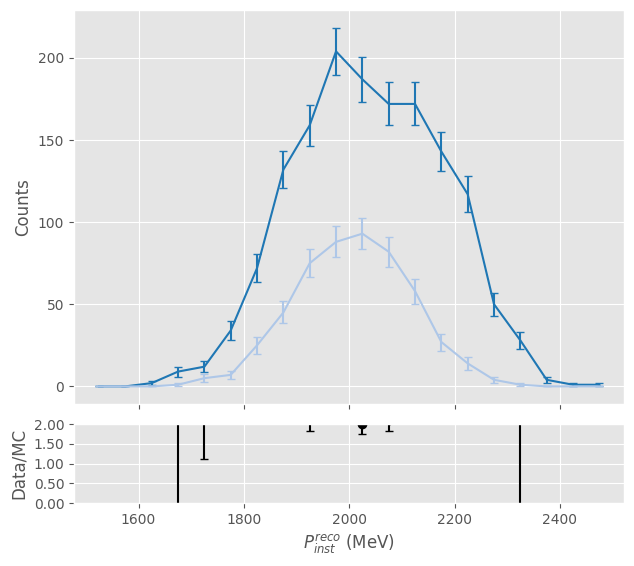

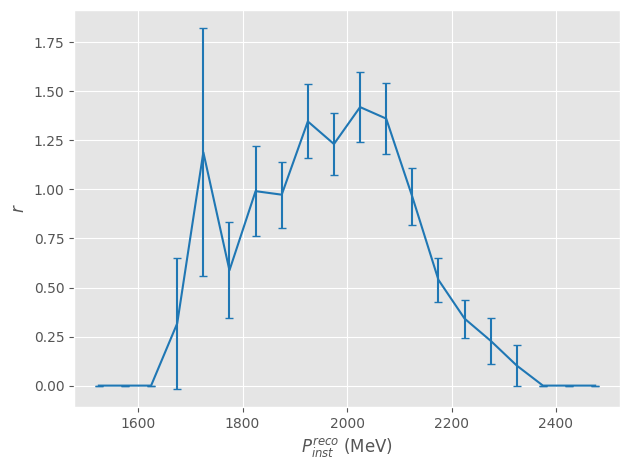

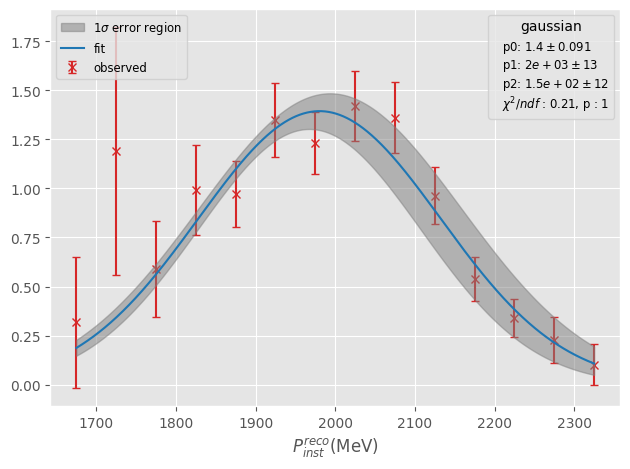

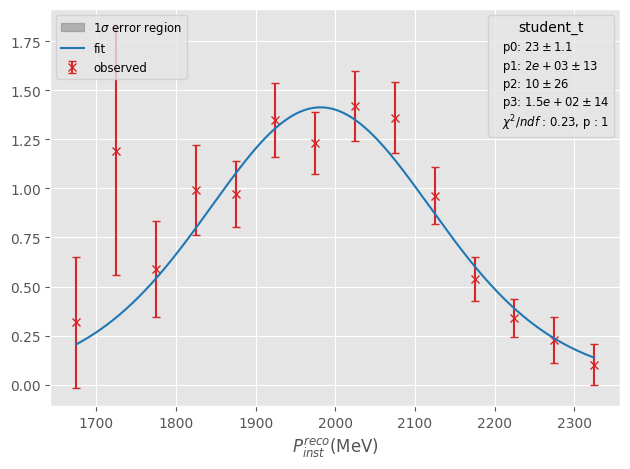

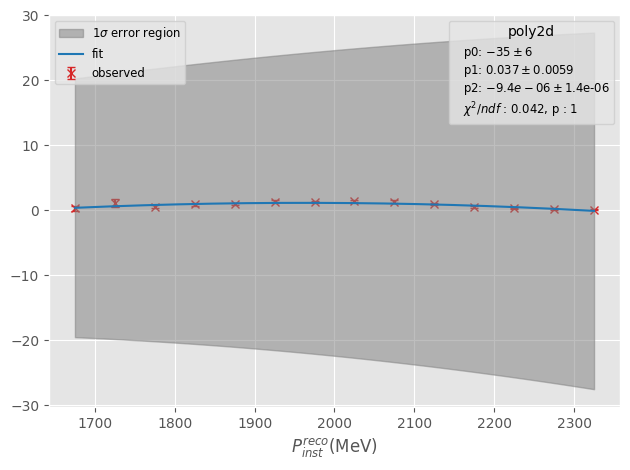

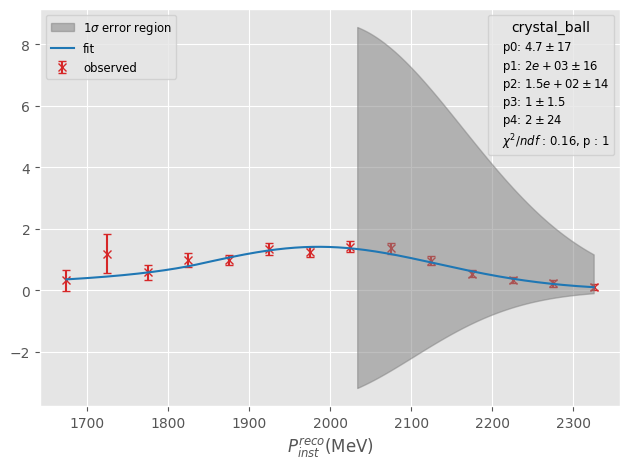

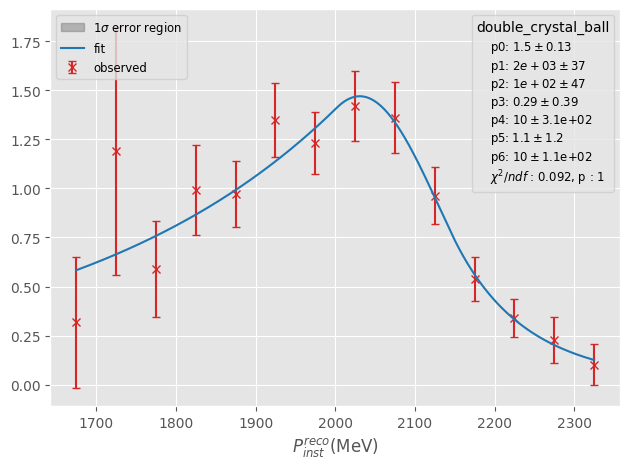

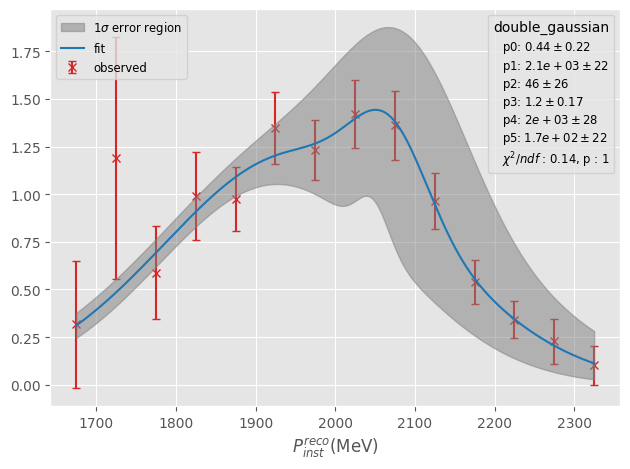

In [39]:
book = Plots.PlotBook("2GeV_reweight.pdf", True)
results = ReWeight(sideband_sample, args_pion.beam_momentum, 20, np.array([0.75, 1.25]), book = book)

p=array([ 104.56458627, 2026.99294434,  139.05549005])

p_err=array([5.82148605, 6.42282432, 5.17911949])

p=array([ 288.84270504, 2040.0014861 ,  145.52356038])

p_err=array([9.45024387, 4.10681673, 3.29131303])

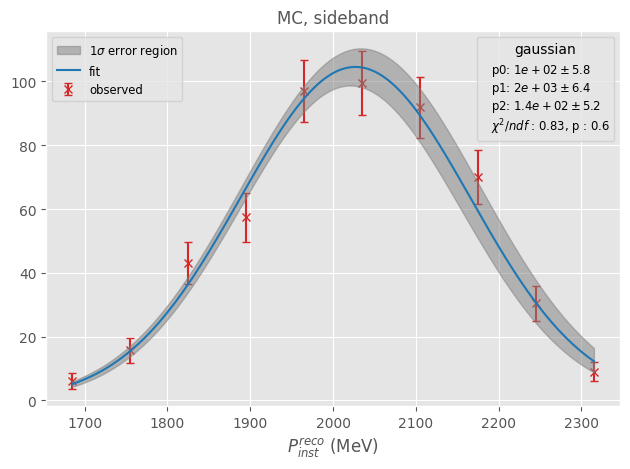

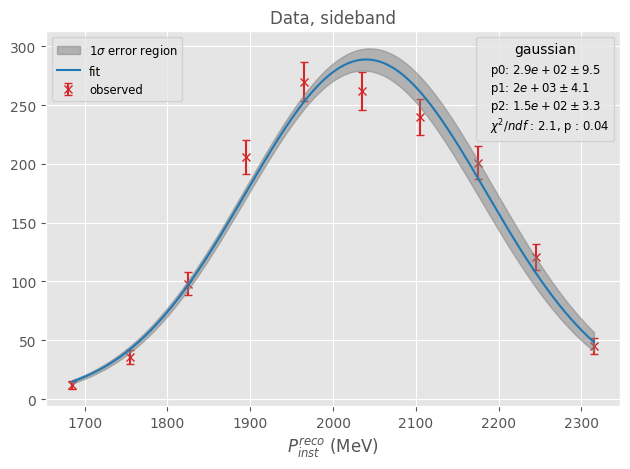

In [40]:
def SmearingFactors(sample, weights : np.array = None):
    average = np.average(sample.recoParticles.beam_inst_P, weights=weights)
    variance = np.average((sample.recoParticles.beam_inst_P-average)**2, weights=weights)
    std = np.sqrt(variance)
    return average, std

sideband_weights = RatioWeights(sideband_sample["mc"], "gaussian", results["gaussian"][0], 3)
smearing_results = cex_beam_reweight.Smearing(sideband_sample["mc"].recoParticles.beam_inst_P, sideband_sample["data"].recoParticles.beam_inst_P, 10, [1650, 2350], book, sideband_weights)

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1285: RuntimeWarning: divide by zero encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1285: RuntimeWarning: invalid value encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1286: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((data_err/h_data)**2 + (mc_error/h_mc)**2)


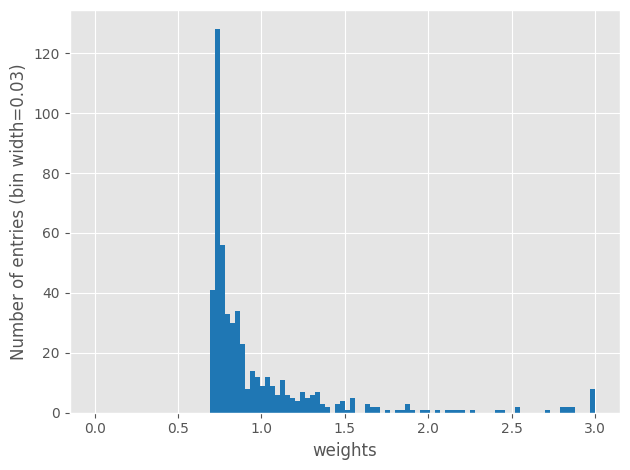

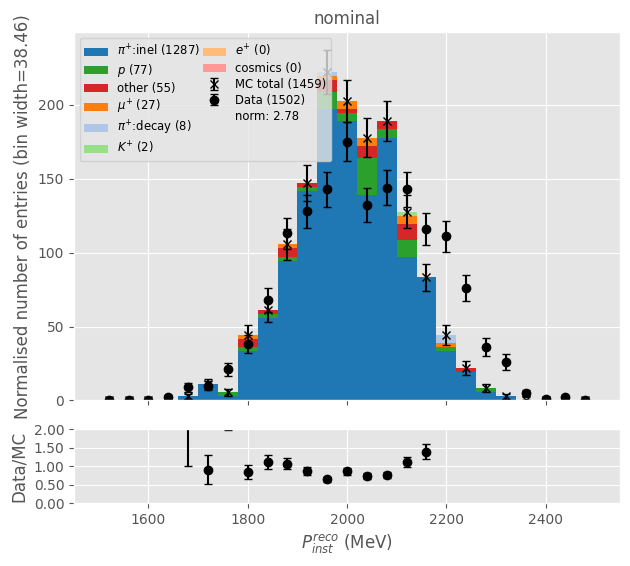

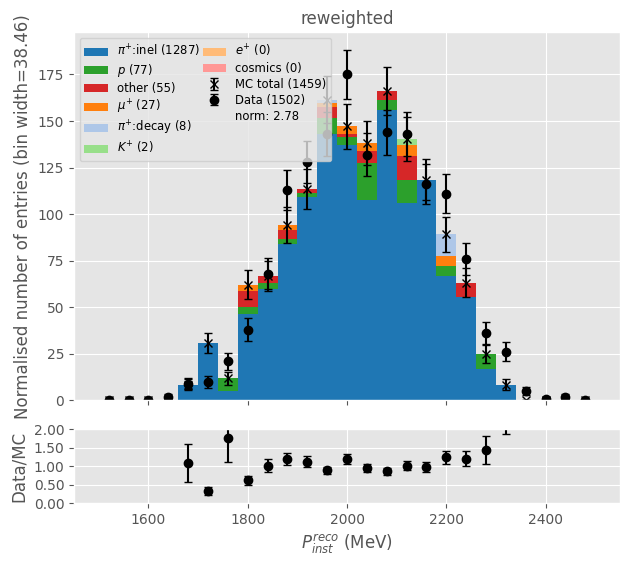

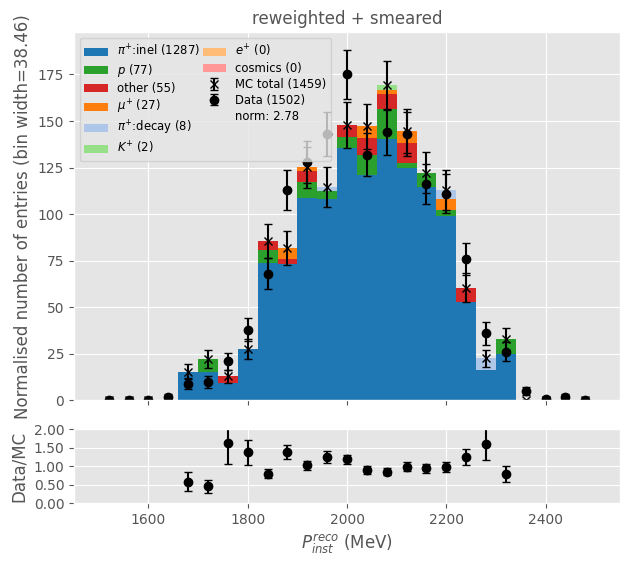

In [41]:
ReWeightResults(sideband_sample, args_pion, 25, results, smearing_results, book = book)

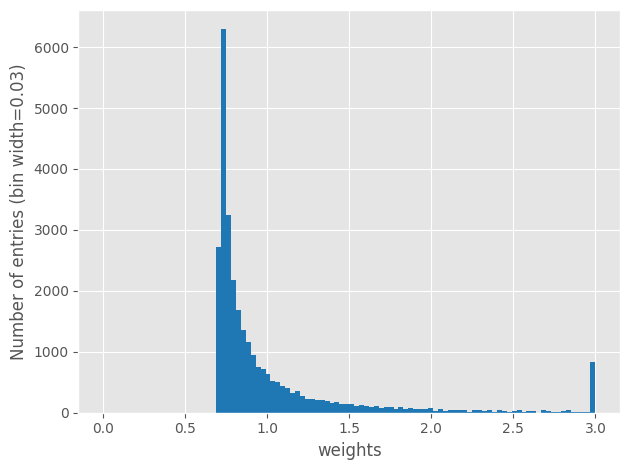

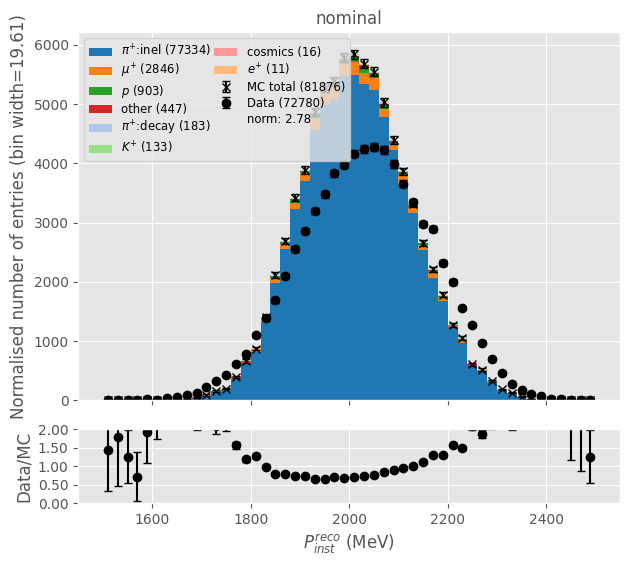

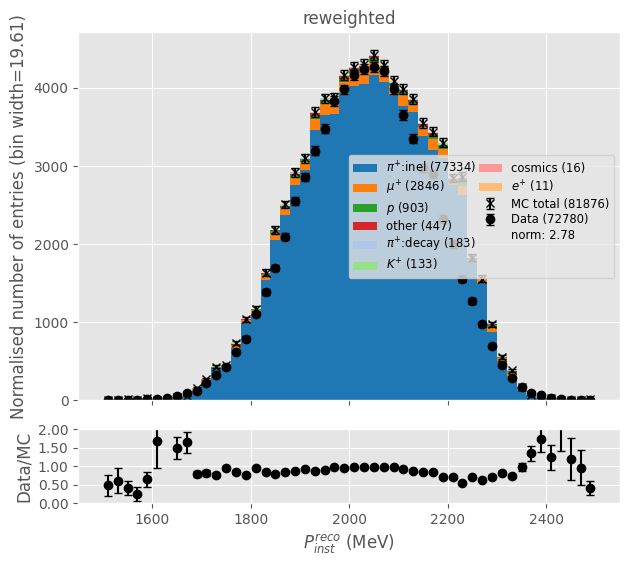

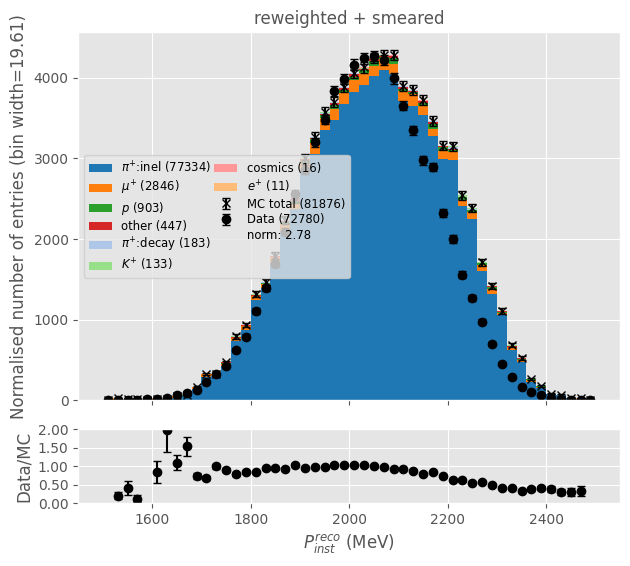

In [42]:
ReWeightResults(pion_sample, args_pion, 50, results, smearing_results, book = book)

In [43]:
book.close()

pdf 2GeV_reweight.pdf has been closed


In [48]:
reweight_params = {f"p{i}" : {"value" : results["gaussian"][0][i], "error" : results["gaussian"][1][i]} for i in range(cross_section.Fitting.gaussian.n_params)}

cross_section.SaveConfiguration("test/2GeV_reweight_params.json", reweight_params)


In [45]:
weights = RatioWeights(pion_sample["mc"], "gaussian", results["gaussian"][0], 3)
smearing = np.random.normal(smearing_results[0][0], smearing_results[1][0], len(pion_sample["mc"].recoParticles.beam_inst_P))

energies = cex_beam_reweight.KEs(pion_sample, args_pion.upstream_loss_correction_params["value"], smearing)
energies_n = cex_beam_reweight.KEs(pion_sample, args_pion.upstream_loss_correction_params["value"], None)

'RecoDepositedEnergy' executed in 11.8810s

'RecoDepositedEnergy' executed in 49.6427s

'RecoDepositedEnergy' executed in 0.8552s

'RecoDepositedEnergy' executed in 2.3323s

nominal
pdf pion_2GeV_nominal.pdf has been opened


/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1285: RuntimeWarning: divide by zero encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1286: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((data_err/h_data)**2 + (mc_error/h_mc)**2)


pdf pion_2GeV_nominal.pdf has been closed


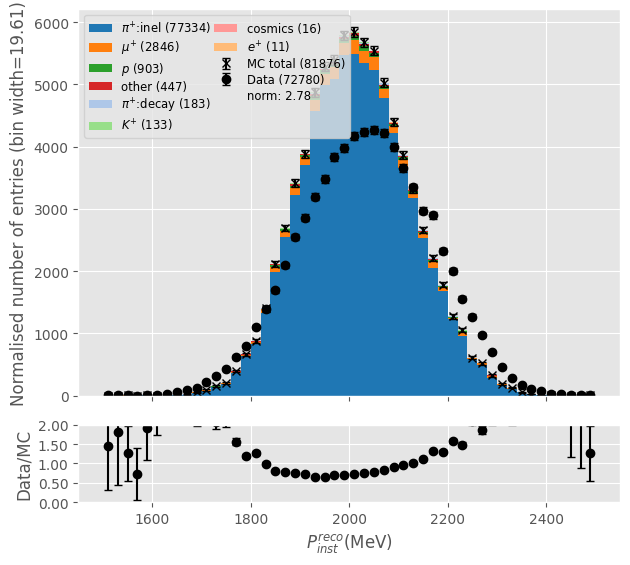

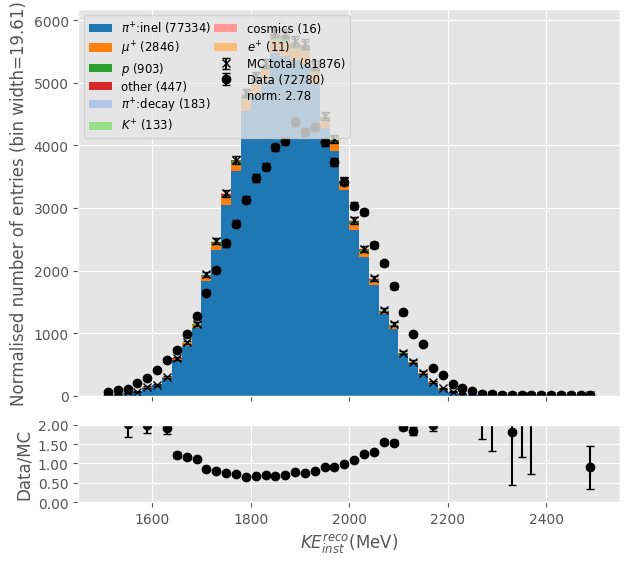

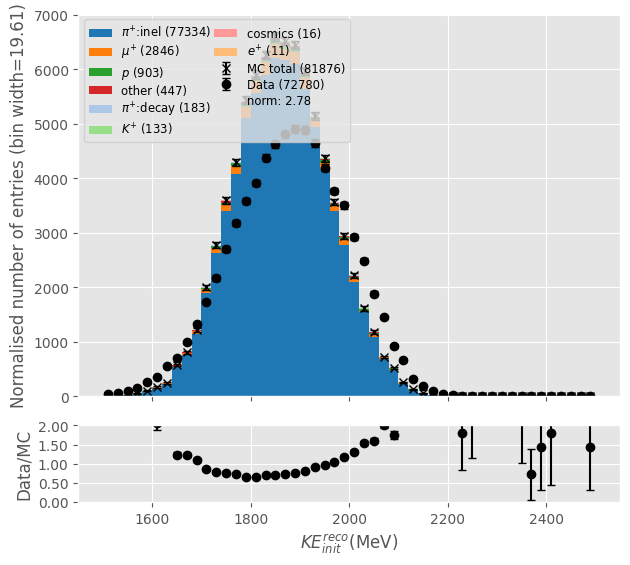

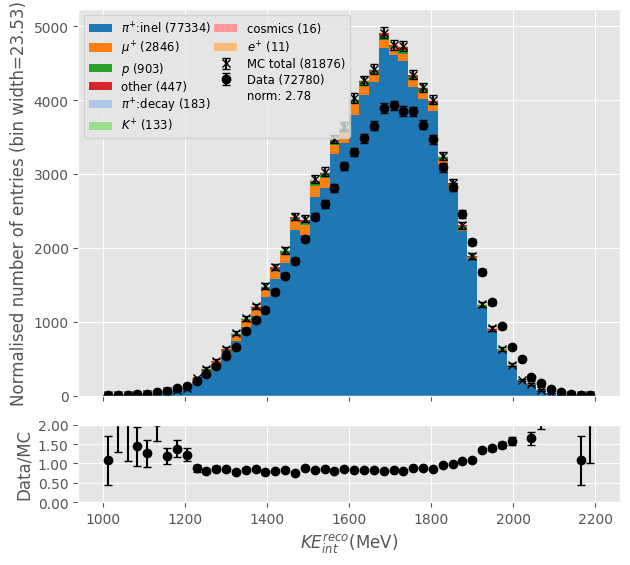

reweighted
pdf pion_2GeV_reweight.pdf has been opened


/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1285: RuntimeWarning: divide by zero encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1286: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((data_err/h_data)**2 + (mc_error/h_mc)**2)


pdf pion_2GeV_reweight.pdf has been closed
reweighted + smeared
pdf pion_2GeV_reweight_smear.pdf has been opened


/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1285: RuntimeWarning: divide by zero encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1286: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((data_err/h_data)**2 + (mc_error/h_mc)**2)


pdf pion_2GeV_reweight_smear.pdf has been closed


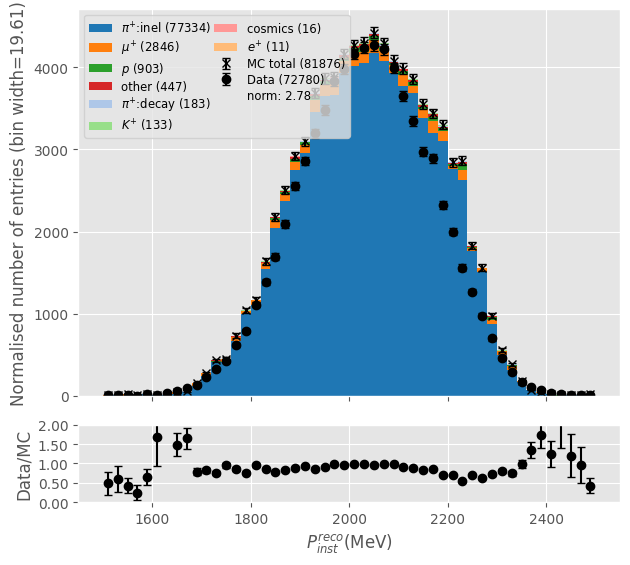

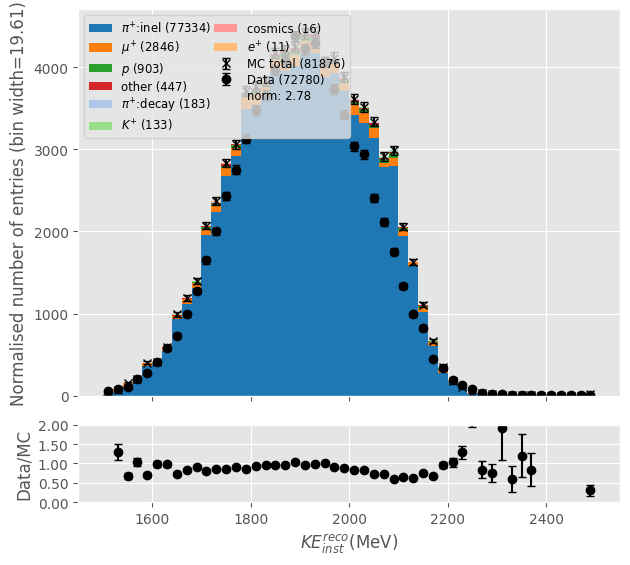

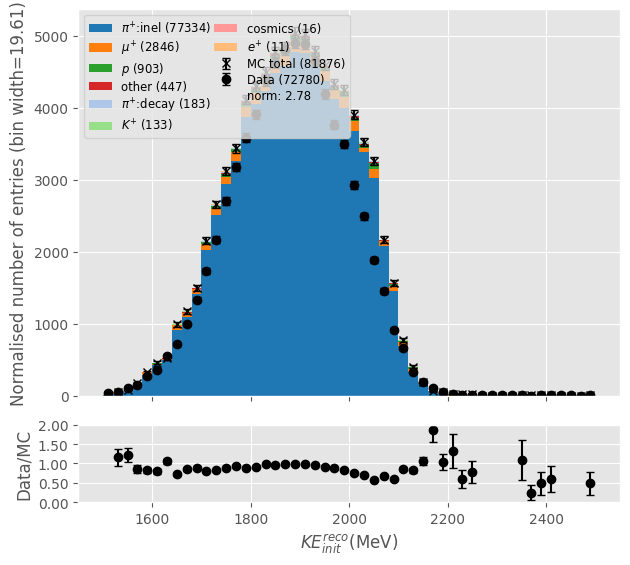

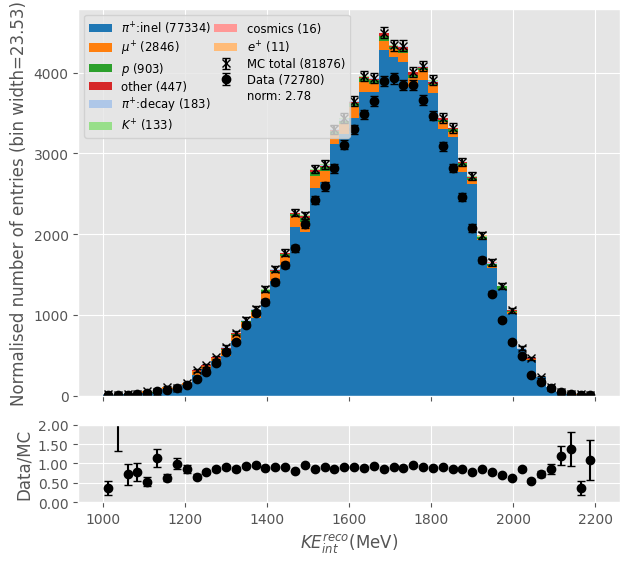

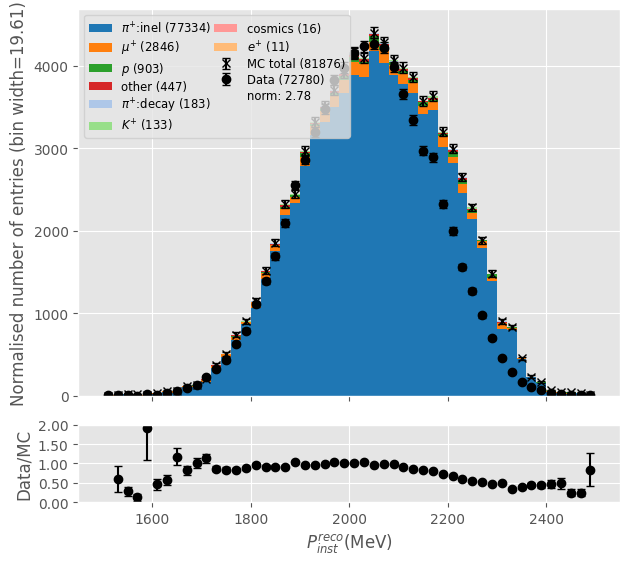

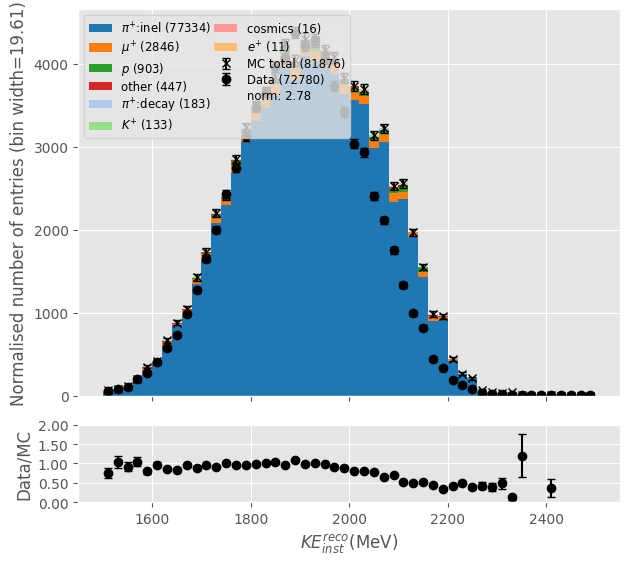

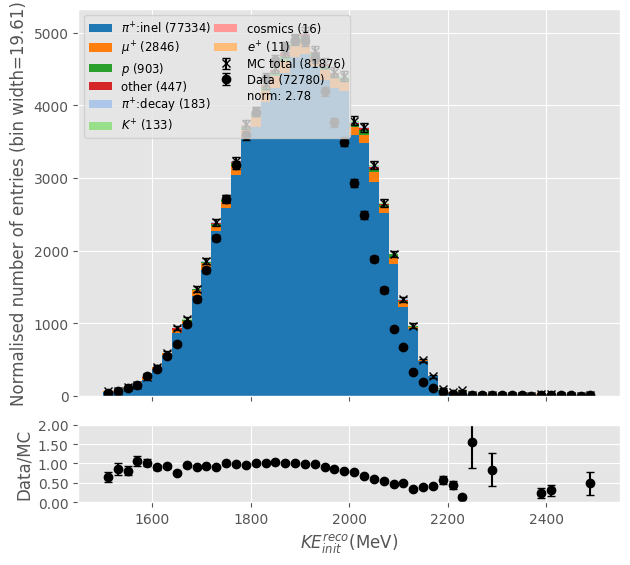

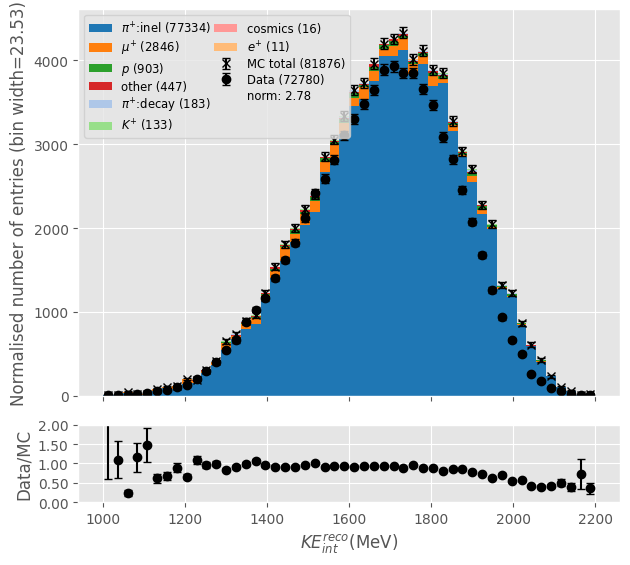

In [47]:
print("nominal")
with Plots.PlotBook("pion_2GeV_nominal.pdf", True) as book:
    cex_beam_reweight.MakePlots(pion_sample, energies_n, cross_section.Tags.GenerateTrueBeamParticleTags, args_pion, None, None, book)
Plots.plt.show()

print("reweighted")
with Plots.PlotBook("pion_2GeV_reweight.pdf", True) as book:
    cex_beam_reweight.MakePlots(pion_sample, energies_n, cross_section.Tags.GenerateTrueBeamParticleTags, args_pion, weights, None, book)

print("reweighted + smeared")
with Plots.PlotBook("pion_2GeV_reweight_smear.pdf", True) as book:
    cex_beam_reweight.MakePlots(pion_sample, energies, cross_section.Tags.GenerateTrueBeamParticleTags, args_pion, weights, smearing, book)
Plots.plt.show()

# stopping muon reweight

In [ ]:
args_stopping_muon = cross_section.ApplicationArguments.ResolveConfig(cross_section.LoadConfiguration("work/2023/cex_analysis_2GeV_stopping_muon_config.json"))
samples_stopping_muon = {"mc" : Master.Data(args_stopping_muon.mc_file, nTuple_type = args_stopping_muon.ntuple_type), "data" : Master.Data(args_stopping_muon.data_file, nTuple_type = args_stopping_muon.ntuple_type)}


In [12]:
muon = cross_section.Particle.from_pdgid(-13)
true_fractional_range = stopping_muon_sample["mc"].trueParticles.beam_track_length / cross_section.BetheBloch.RangeFromKE(stopping_muon_sample["mc"].trueParticles.beam_KE_front_face, muon)

reco_fractional_range = cex_beam_reweight.RecoFractionalRange(stopping_muon_sample["mc"], muon, args_stopping_muon)
reco_fractional_range_data = cex_beam_reweight.RecoFractionalRange(stopping_muon_sample["data"], muon, args_stopping_muon)

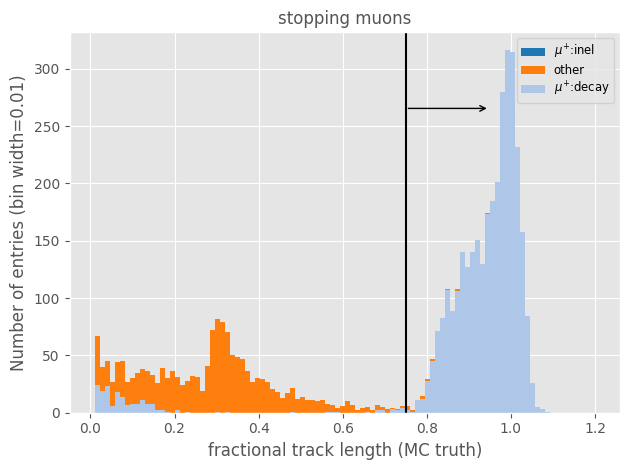

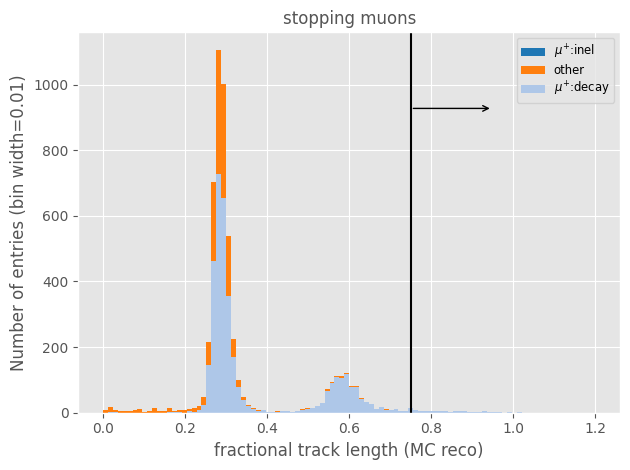

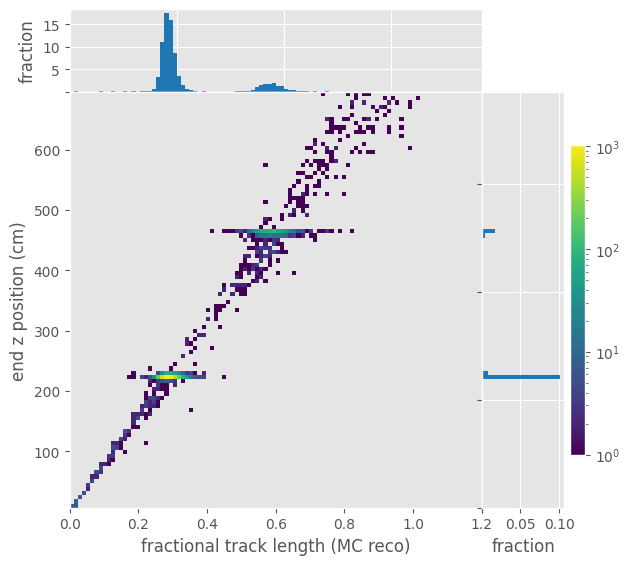

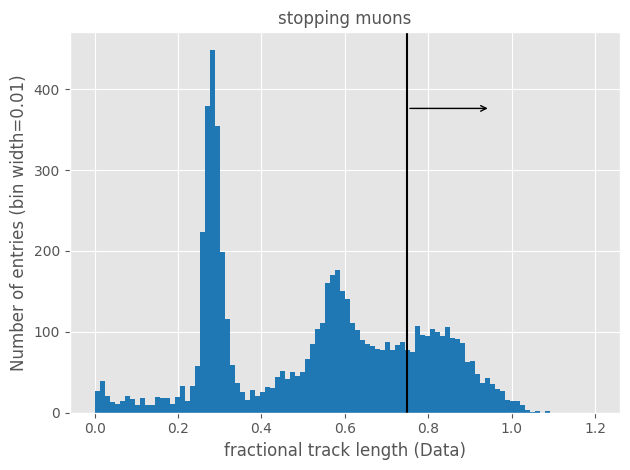

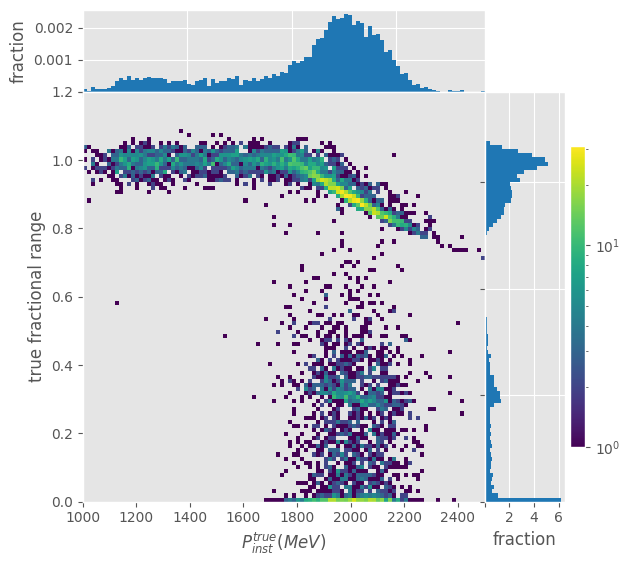

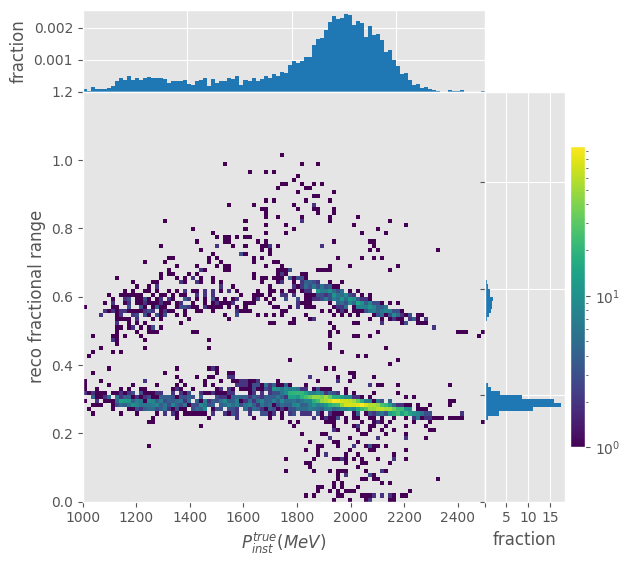

In [13]:
stopping_muon_cut = 0.75 # 0.9 for 1GeV sample
with Plots.PlotBook("stopping_muon_selection.pdf", False) as book:
    Plots.PlotTagged(true_fractional_range, cross_section.Tags.StoppingMuonTag(stopping_muon_sample["mc"]), ncols = 1, x_range = [0.01, 1.2], x_label = "fractional track length (MC truth)", title = "stopping muons")
    Plots.DrawCutPosition(stopping_muon_cut, face = ">")
    book.Save()

    Plots.PlotTagged(reco_fractional_range, cross_section.Tags.StoppingMuonTag(stopping_muon_sample["mc"]), ncols = 1, x_range = [0, 1.2], x_label = "fractional track length (MC reco)", title = "stopping muons")
    Plots.DrawCutPosition(stopping_muon_cut, face = ">")
    book.Save()

    Plots.PlotHist2DMarginal(reco_fractional_range, stopping_muon_sample["mc"].recoParticles.beam_endPos_SCE.z, x_range = [0, 1.2], xlabel = "fractional track length (MC reco)", ylabel = "end z position (cm)")
    book.Save()

    Plots.PlotHist(reco_fractional_range_data, range = [0, 1.2], xlabel = "fractional track length (Data)", title = "stopping muons")
    Plots.DrawCutPosition(stopping_muon_cut, face = ">")
    book.Save()

    Plots.PlotHist2DMarginal(vector.magnitude(stopping_muon_sample["mc"].trueParticles.momentum[:, 0]), true_fractional_range, x_range = args_stopping_muon.P_inst_range, y_range = [0, 1.2], xlabel = "$P_{inst}^{true}(MeV)$", ylabel = "true fractional range")
    book.Save()

    Plots.PlotHist2DMarginal(vector.magnitude(stopping_muon_sample["mc"].trueParticles.momentum[:, 0]), reco_fractional_range, x_range = args_stopping_muon.P_inst_range, y_range = [0, 1.2], xlabel = "$P_{inst}^{true}(MeV)$", ylabel = "reco fractional range")
    book.Save()


In [14]:
samples_stopping_muon_selected = {"mc" : stopping_muon_sample["mc"].Filter([reco_fractional_range > stopping_muon_cut], [reco_fractional_range > stopping_muon_cut], True), "data" : stopping_muon_sample["data"].Filter([reco_fractional_range_data > stopping_muon_cut], [reco_fractional_range_data > stopping_muon_cut], True)}

\begin{tabular}{llrrrrrrr}
 & Name & Remaining events & Percentage of total events remaining & Relative percentage events & Remaining PFOs & Percentage of total PFOs remaining & Relative percentage of PFOs & Average PFOs per event \\
0 & Initial data & 141548 & 100.000000 & 100.000000 & 422469 & 100.000000 & 100.000000 & 2.984634 \\
1 & - & 102443 & 72.373329 & 72.373329 & 339292 & 80.311692 & 80.311692 & 3.312008 \\
2 & - & 89274 & 63.069771 & 87.145047 & 324545 & 76.821021 & 95.653596 & 3.635381 \\
3 & - & 87403 & 61.747958 & 97.904205 & 317779 & 75.219484 & 97.915235 & 3.635791 \\
4 & - & 68113 & 48.120072 & 77.929819 & 242603 & 57.425042 & 76.343308 & 3.561772 \\
5 & - & 62390 & 44.076921 & 91.597786 & 222314 & 52.622559 & 91.636954 & 3.563295 \\
6 & - & 59944 & 42.348885 & 96.079500 & 215014 & 50.894622 & 96.716356 & 3.586914 \\
7 & - & 5267 & 3.720999 & 8.786534 & 15170 & 3.590796 & 7.055355 & 2.880197 \\
8 & - & 81 & 0.057224 & 1.537877 & 204 & 0.048288 & 1.344759 & 2.518519 \\


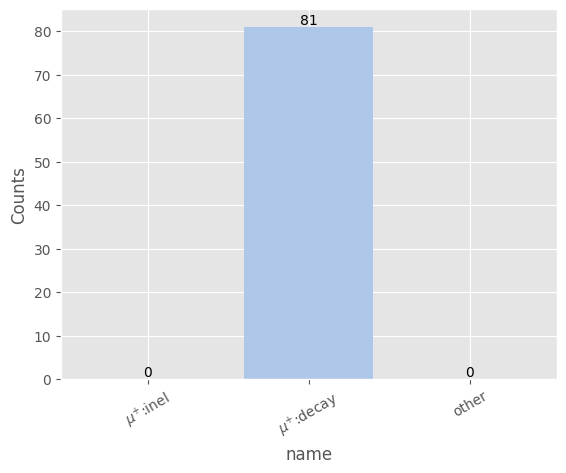

In [15]:
print(samples_stopping_muon_selected["mc"].cutTable.get_table().style.to_latex())
print(samples_stopping_muon_selected["data"].cutTable.get_table().style.to_latex())
Plots.PlotTags(cross_section.Tags.StoppingMuonTag(samples_stopping_muon_selected["mc"]))

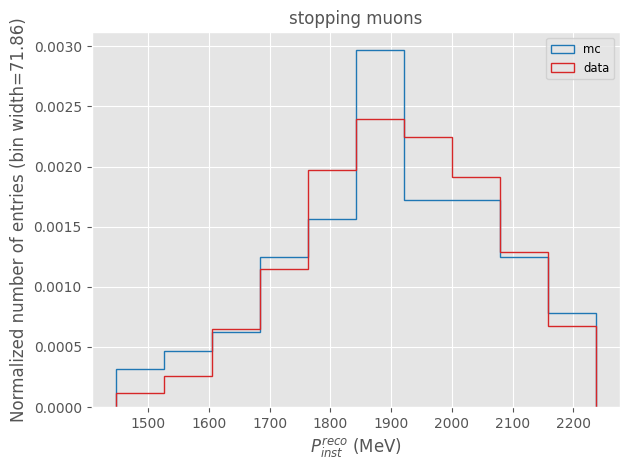

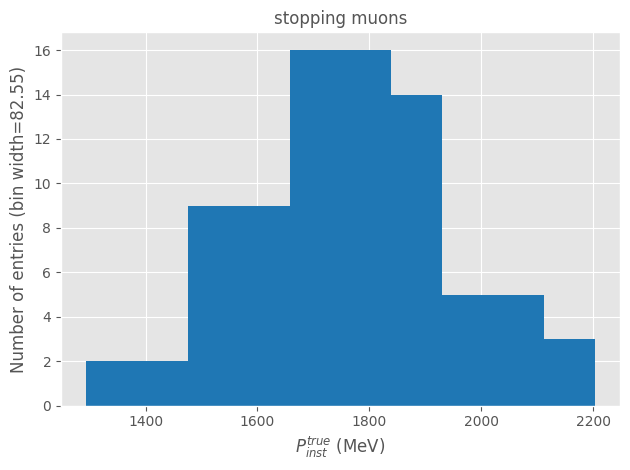

In [18]:
book = Plots.PlotBook("reweight.pdf", False)

Plots.PlotHistComparison([s.recoParticles.beam_inst_P for s in samples_stopping_muon_selected.values()], labels = list(samples_stopping_muon_selected.keys()), bins = 10, xlabel = "$P_{inst}^{reco}$ (MeV)", colours = ["C0", "C6"], title = "stopping muons")
book.Save()

p_inst_true = vector.magnitude(samples_stopping_muon_selected["mc"].trueParticles.momentum[:, 0])

Plots.PlotHist(p_inst_true, xlabel = "$P_{inst}^{true}$ (MeV)", title = "stopping muons", bins = 10)
book.Save()

p=array([13.9284988 ,  0.87606849,  0.08422998])

p_err=array([2.15196786, 0.01069051, 0.00965206])

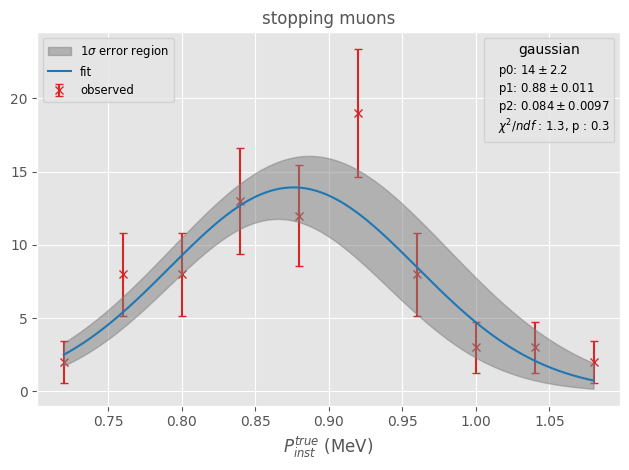

In [27]:
true_params, true_params_err = cex_beam_reweight.GaussFit(p_inst_true/args_stopping_muon.beam_momentum, [1400/2000, 2200/2000], 10, book, "$P_{inst}^{true}$ (MeV)", "stopping muons")

In [28]:
range_to_KE = cross_section.BetheBloch.interp_range_to_KE(2 * args_stopping_muon.beam_momentum)

18.469135802469136


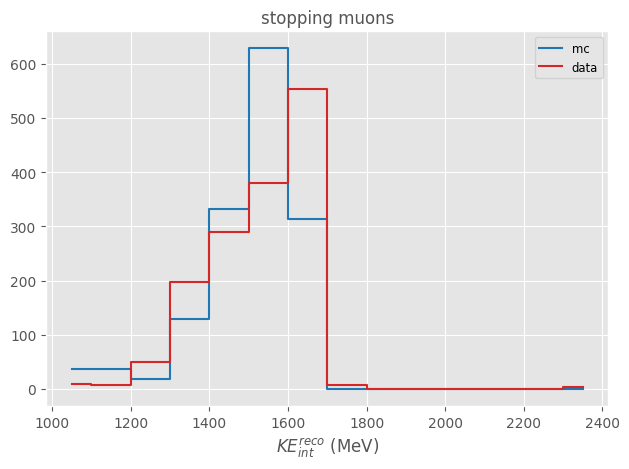

In [29]:
# KE_ff_range_bins = np.linspace(args_stopping_muon.KE_inst_range[0], args_stopping_muon.KE_inst_range[1], 15)
KE_ff_range_bins = np.linspace(0.5 * args_stopping_muon.beam_momentum, 1.2 * args_stopping_muon.beam_momentum, 15)

KE_ff_range = {k :range_to_KE(v.recoParticles.beam_track_length) for k, v in samples_stopping_muon_selected.items()}

x = (KE_ff_range_bins[1:] + KE_ff_range_bins[:-1]) / 2
y = {k : np.histogram(np.clip(v, min(KE_ff_range_bins), max(KE_ff_range_bins)), KE_ff_range_bins)[0] for k, v in KE_ff_range.items()}

norm = len(samples_stopping_muon_selected["data"].eventNum)/len(samples_stopping_muon_selected["mc"].eventNum)
print(norm)

Plots.Plot(x, norm * y["mc"], style = "step", color = "C0", label = "mc")
Plots.Plot(x, y["data"], style = "step", color = "C6", label = "data", xlabel = "$KE^{reco}_{int}$ (MeV)", title = "stopping muons", newFigure = False)
book.Save()

In [30]:
args = {
    "mu_0" : true_params[1],
    "sigma_0" : true_params[2],
    "bins" : KE_ff_range_bins,
    "norm" : norm,
    "p_inst_true" : p_inst_true/args_stopping_muon.beam_momentum,
    "KE_init_range" : KE_ff_range,
    }

result = minimize(cex_beam_reweight.Chi2KE, [true_params[1], true_params[2]], args = [args], method = "simplex")
print(result.minuit)

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -0.8389                    │              Nfcn = 14               │
│ EDM = 0.0155 (Goal: 0.05)        │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

In [44]:
{f"p{i}" : v for i, v in enumerate(result.minuit.values)}

{'p0': 0.970561490797886, 'p1': 0.07298674406543641}

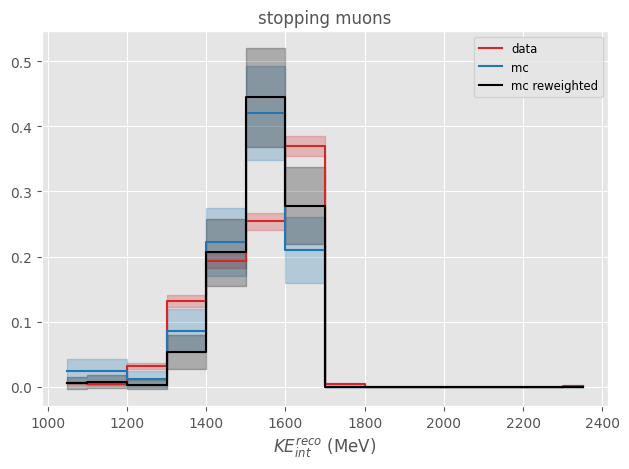

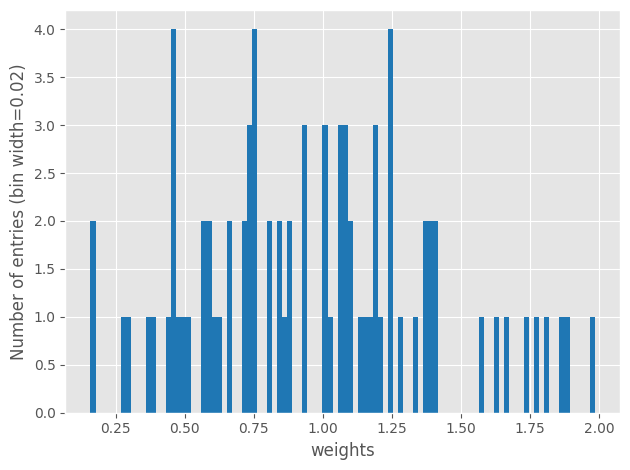

In [31]:
weights_stopping_muon = cex_beam_reweight.Weights(args["p_inst_true"], result.x[0], result.x[1], true_params[1], true_params[2])

hist_data = np.histogram(np.clip(args["KE_init_range"]["data"], min(args["bins"]), max(args["bins"])), args["bins"])[0]
hist_mc = np.histogram(np.clip(args["KE_init_range"]["mc"], min(args["bins"]), max(args["bins"])), args["bins"])[0]
hist_mc_weighted = np.histogram(np.clip(args["KE_init_range"]["mc"], min(args["bins"]), max(args["bins"])), args["bins"], weights = weights_stopping_muon)[0]


x = (KE_ff_range_bins[1:] + KE_ff_range_bins[:-1]) / 2
Plots.Plot(x, hist_data / sum(hist_data), yerr = np.sqrt(hist_data) / sum(hist_data), style = "step", label = "data", color = "C6")
Plots.Plot(x, hist_mc / sum(hist_mc), yerr = np.sqrt(hist_mc) / sum(hist_mc), style = "step", label = "mc", color = "C0", newFigure = False)
Plots.Plot(x, hist_mc_weighted / sum(hist_mc_weighted), yerr = np.sqrt(hist_mc_weighted) / sum(hist_mc_weighted), style = "step", label = "mc reweighted", color = "k", xlabel = "$KE^{reco}_{int}$ (MeV)", title = "stopping muons", newFigure = False)
book.Save()
Plots.PlotHist(weights_stopping_muon, xlabel = "weights")
book.Save()

p=array([  30.54147187, 1938.24420872,  164.26965874])

p_err=array([ 4.38499517, 19.1765701 , 14.38128157])

p=array([ 571.66465859, 1922.22856964,  173.96244622])

p_err=array([18.38526997,  4.57829454,  3.42473638])

p=array([  30.92139304, 1910.81367029,  164.51550481])

p_err=array([ 4.43429032, 19.09868488, 14.48449828])

p=array([ 571.66465859, 1922.22856964,  173.96244622])

p_err=array([18.38526997,  4.57829454,  3.42473638])

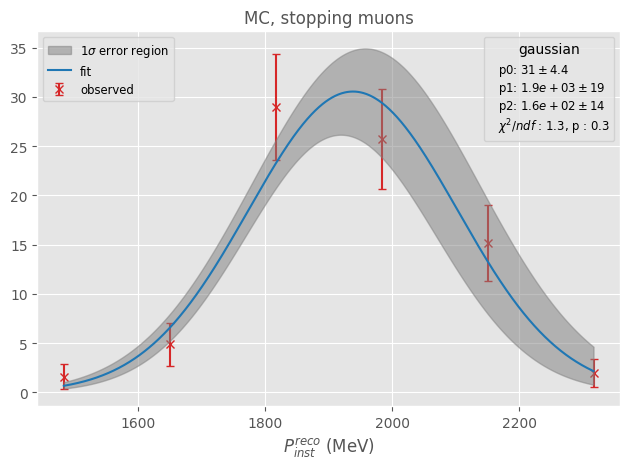

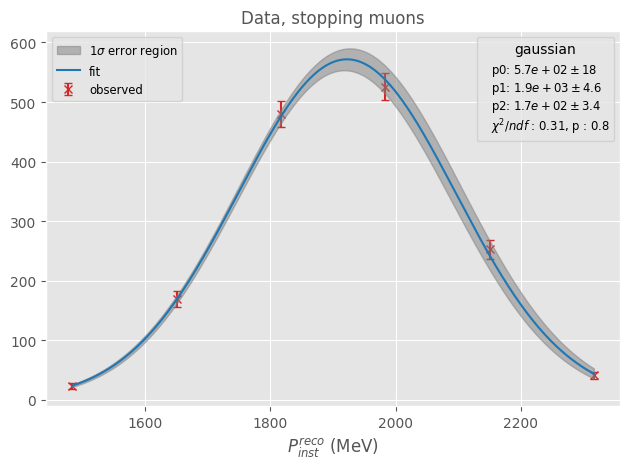

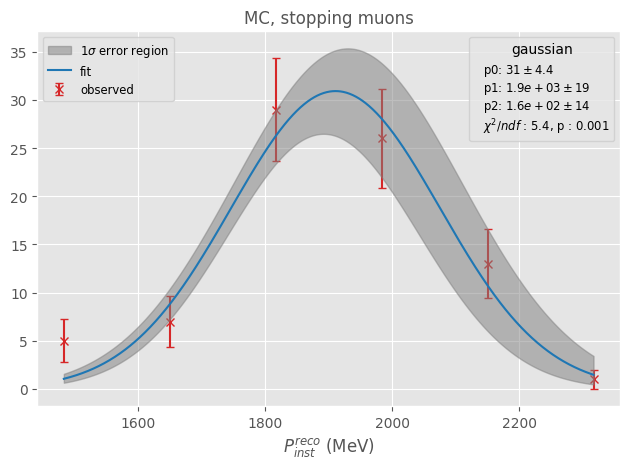

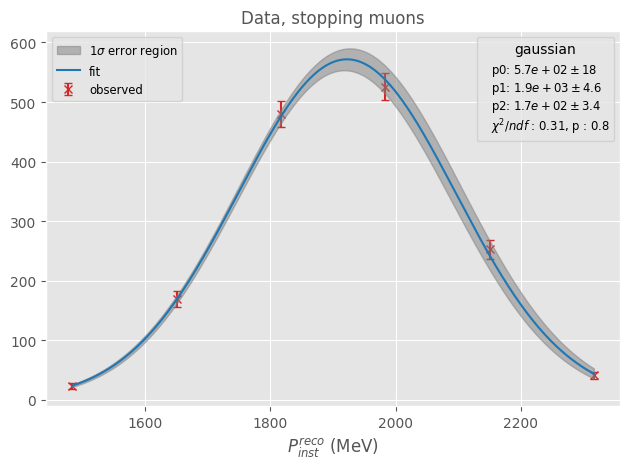

In [40]:
# p_range = [0.8 * args_stopping_muon.beam_momentum, 1.2 * args_stopping_muon.beam_momentum]
p_range = [1400, 2400]
bins = 6

smearing_mu_rw, smearing_sigma_rw, _, _  = cex_beam_reweight.Smearing(samples_stopping_muon_selected["mc"].recoParticles.beam_inst_P, samples_stopping_muon_selected["data"].recoParticles.beam_inst_P, bins, p_range, book, weights_stopping_muon)
smearing_mu, smearing_sigma, _, _  = cex_beam_reweight.Smearing(samples_stopping_muon_selected["mc"].recoParticles.beam_inst_P, samples_stopping_muon_selected["data"].recoParticles.beam_inst_P, bins, p_range, book)
book.close()

In [41]:
print(smearing_mu, smearing_sigma)
print(smearing_mu_rw, smearing_sigma_rw)

smearing_params = {"mu" : {"value" : smearing_mu[0], "error" : smearing_mu[1]}, "sigma" : {"value" : smearing_sigma[0], "error" : smearing_sigma[1]}}

print(smearing_params)

[11.414899351632812, 19.63976947678757] [56.54716059656925, 43.437603926909794]
[-16.01563908444018, 19.7155172839746] [57.257417960564794, 42.55124763724436]
{'mu': {'value': 11.414899351632812, 'error': 19.63976947678757}, 'sigma': {'value': 56.54716059656925, 'error': 43.437603926909794}}


In [42]:
smearing_stopping_muon = np.random.normal(smearing_mu[0], smearing_sigma[0], len(samples_stopping_muon_selected["mc"].eventNum))
smearing_stopping_muon_rw = np.random.normal(smearing_mu_rw[0], smearing_sigma_rw[0], len(samples_stopping_muon_selected["mc"].eventNum))

# weights_stopping_muon = Weights(vector.magnitude(pion_sample["mc"].trueParticles.momentum[:, 0]), result.x[0], result.x[1], true_params[1], true_params[2])
reco_KE_unsmeared_sm = cex_beam_reweight.KEs(samples_stopping_muon_selected, args_stopping_muon.upstream_loss_correction_params["value"])
reco_KE_smeared_sm = cex_beam_reweight.KEs(samples_stopping_muon_selected, args_stopping_muon.upstream_loss_correction_params["value"], smearing_stopping_muon)
reco_KE_smeared_sm_rw = cex_beam_reweight.KEs(samples_stopping_muon_selected, args_stopping_muon.upstream_loss_correction_params["value"], smearing_stopping_muon_rw)

'RecoDepositedEnergy' executed in 0.1239s

'RecoDepositedEnergy' executed in 0.3758s

'RecoDepositedEnergy' executed in 0.1466s

'RecoDepositedEnergy' executed in 0.3800s

'RecoDepositedEnergy' executed in 0.1251s

'RecoDepositedEnergy' executed in 0.3914s

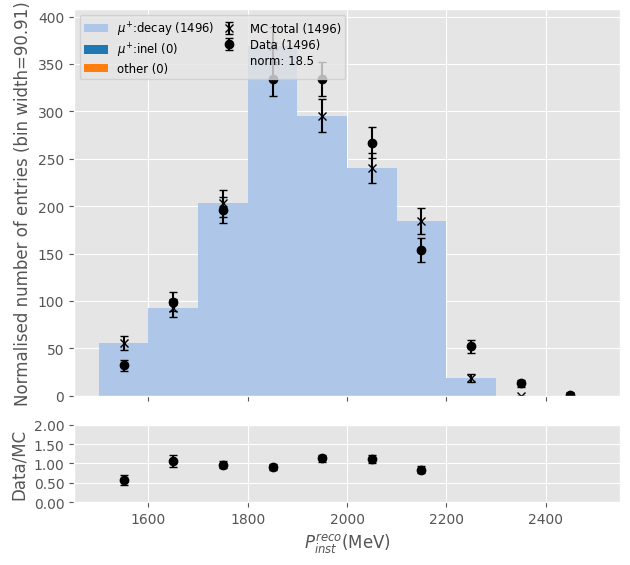

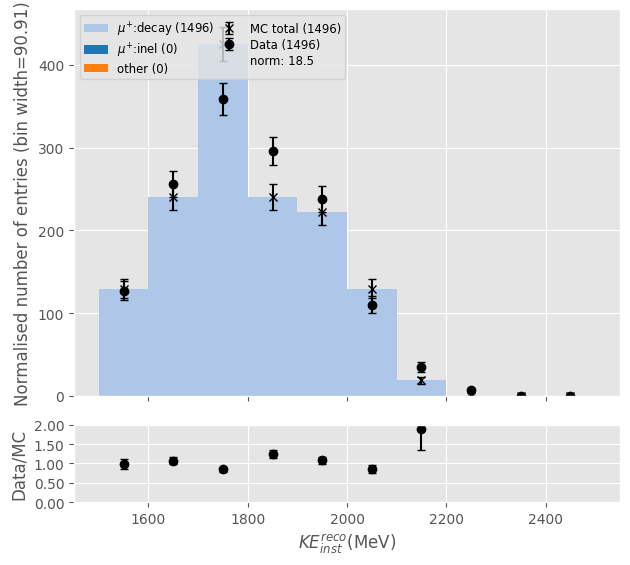

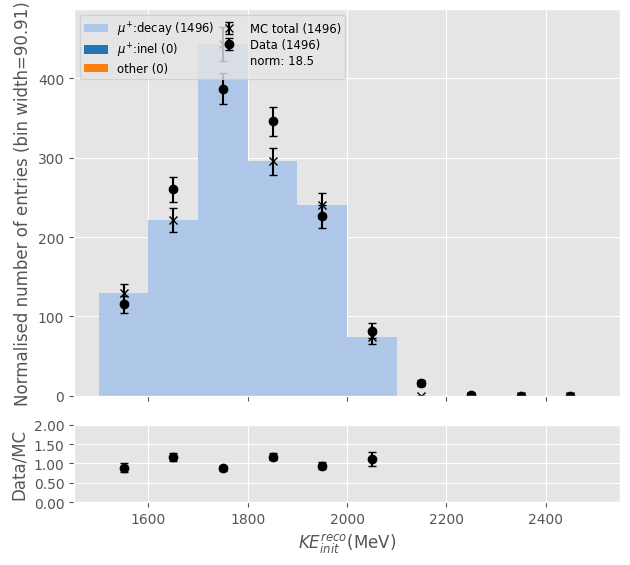

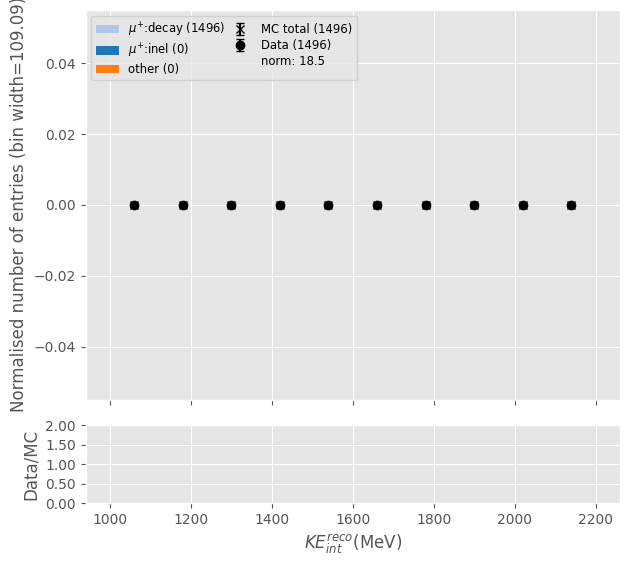

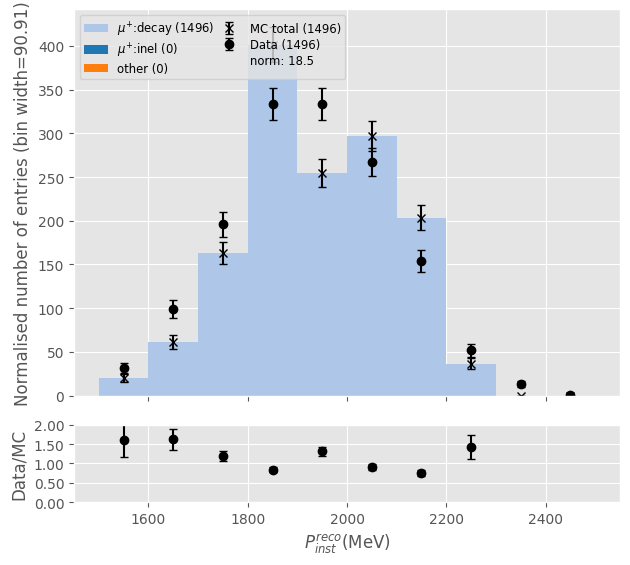

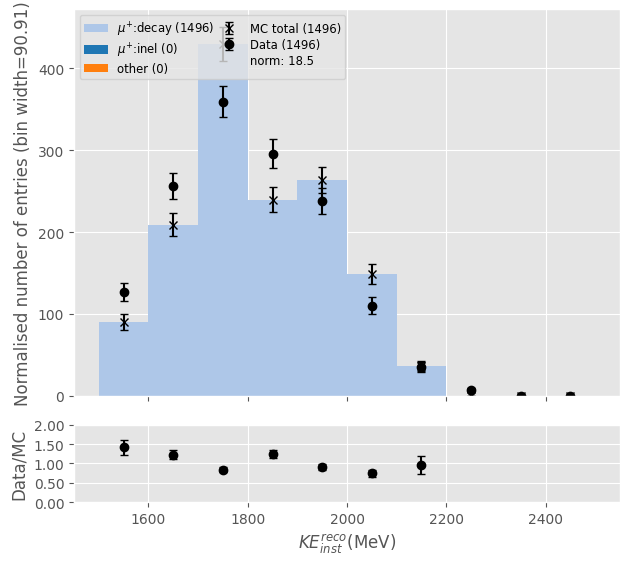

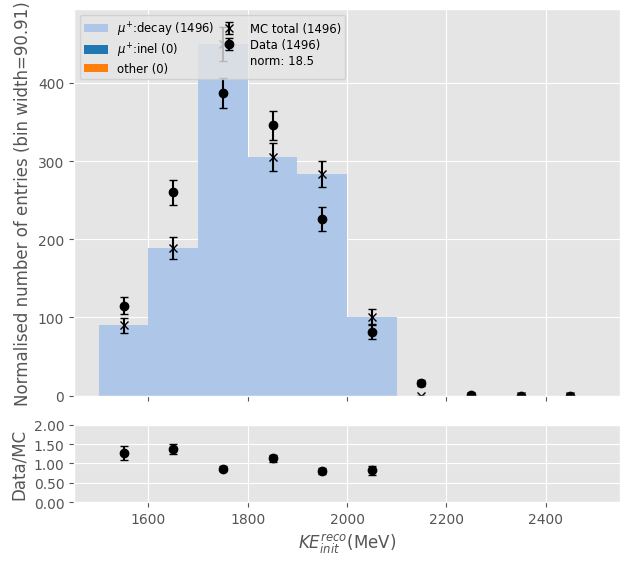

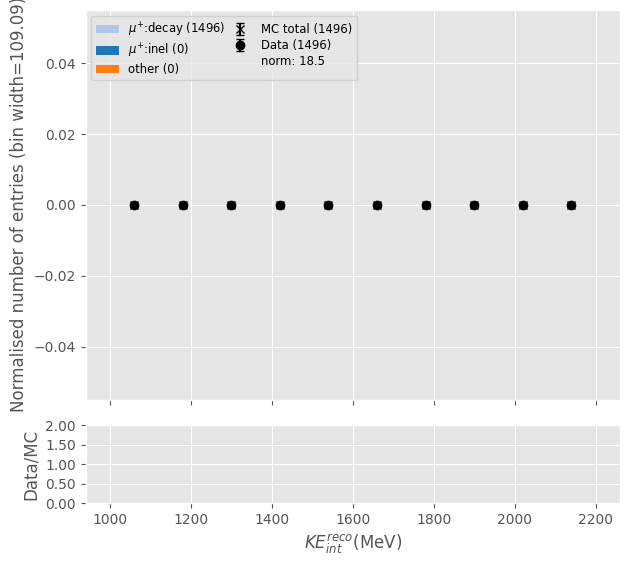

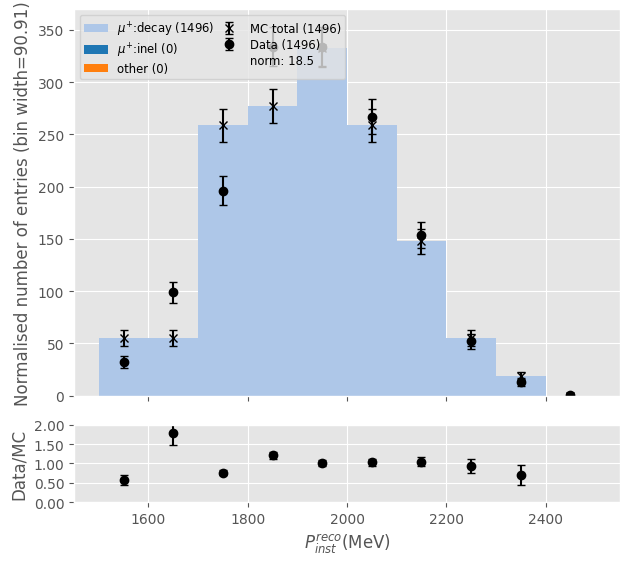

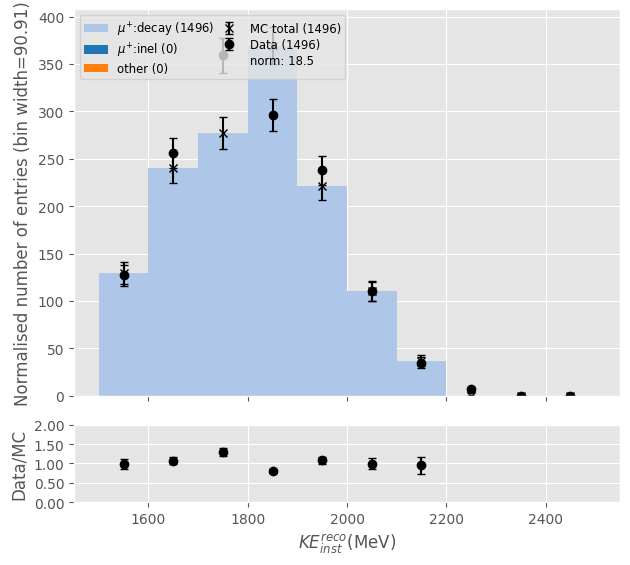

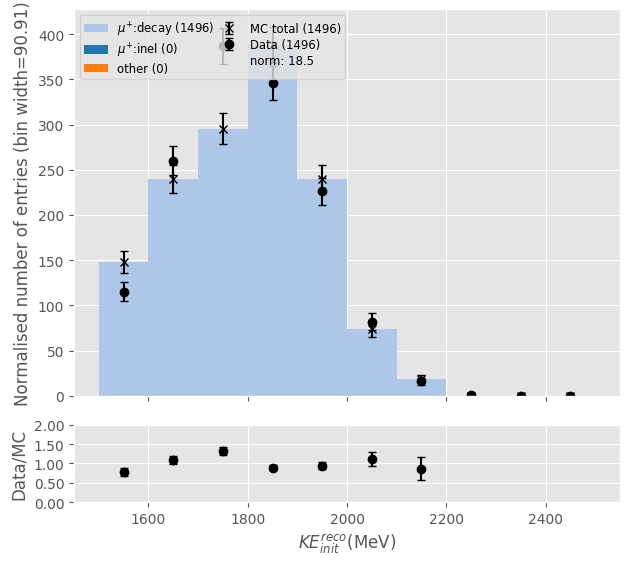

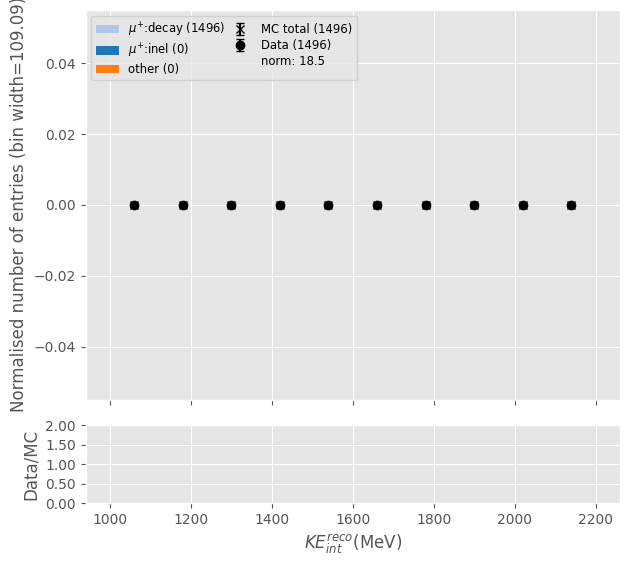

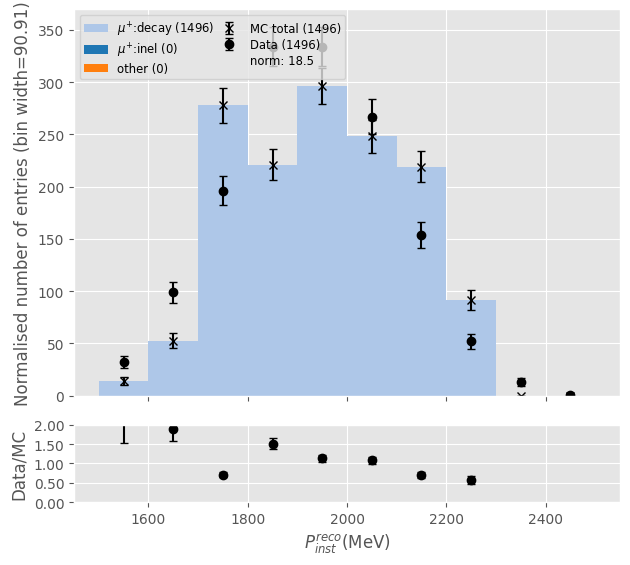

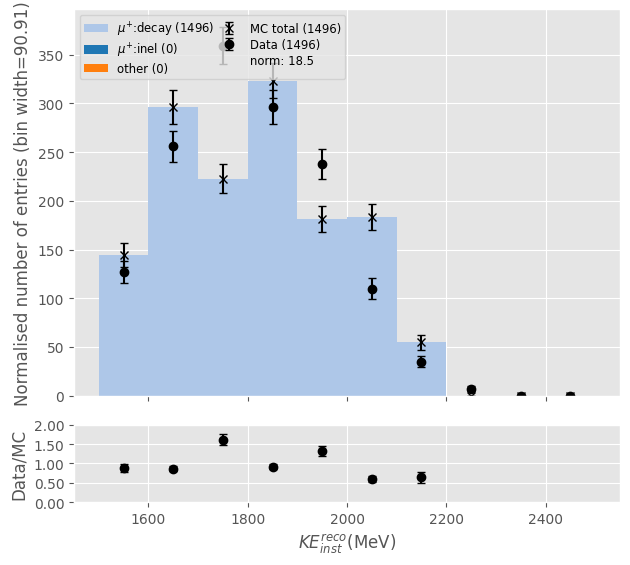

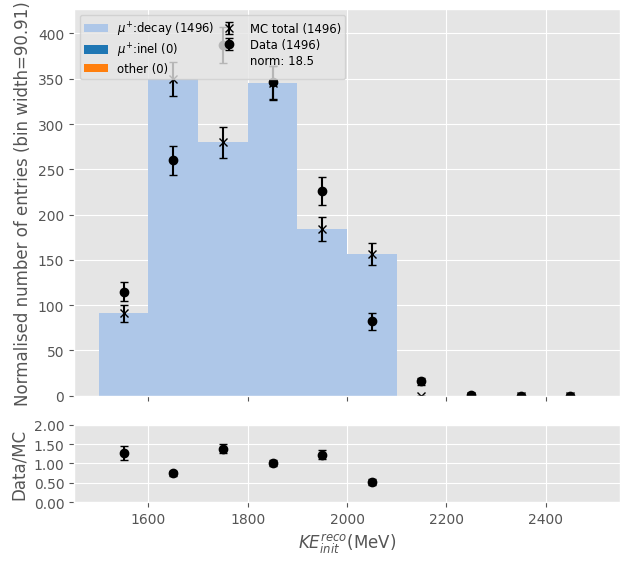

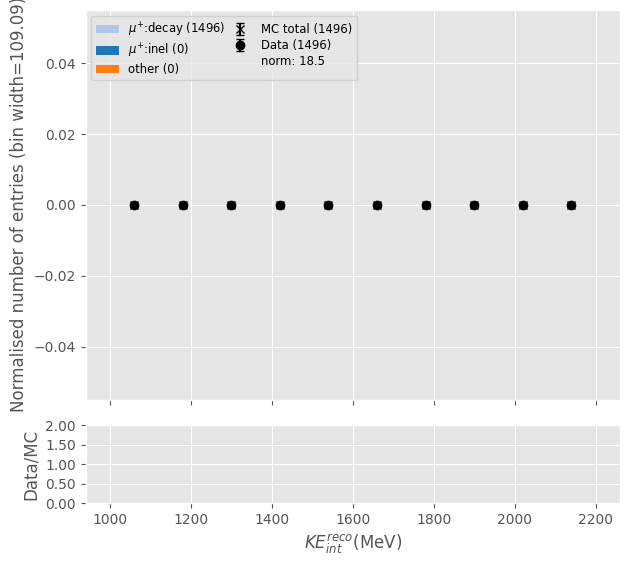

In [44]:
with Plots.PlotBook("stopping_muon_nominal.pdf", False) as book:
    cex_beam_reweight.MakePlots(samples_stopping_muon_selected, reco_KE_unsmeared_sm, cross_section.Tags.StoppingMuonTag, args_stopping_muon, None, None, book, 10)

with Plots.PlotBook("stopping_muon_reweight.pdf", False) as book:
    cex_beam_reweight.MakePlots(samples_stopping_muon_selected, reco_KE_unsmeared_sm, cross_section.Tags.StoppingMuonTag, args_stopping_muon, weights_stopping_muon, None, book, 10)

with Plots.PlotBook("stopping_muon_smeared.pdf", False) as book:
    cex_beam_reweight.MakePlots(samples_stopping_muon_selected, reco_KE_smeared_sm, cross_section.Tags.StoppingMuonTag, args_stopping_muon, None, smearing_stopping_muon, book, 10)

with Plots.PlotBook("stopping_muon_reweight_smeared.pdf", False) as book:
    cex_beam_reweight.MakePlots(samples_stopping_muon_selected, reco_KE_smeared_sm_rw, cross_section.Tags.StoppingMuonTag, args_stopping_muon, weights_stopping_muon, smearing_stopping_muon_rw, book, 10)

In [45]:
smearing_mc_pions = np.random.normal(smearing_mu[0], smearing_sigma[0], len(pion_sample["mc"].eventNum))
smearing_mc_pions_rw = np.random.normal(smearing_mu_rw[0], smearing_sigma_rw[0], len(pion_sample["mc"].eventNum))
weights_pion_sample = cex_beam_reweight.Weights(vector.magnitude(pion_sample["mc"].trueParticles.momentum[:, 0])/args_pion.beam_momentum, result.x[0], result.x[1], true_params[1], true_params[2])

reco_KE_unsmeared = cex_beam_reweight.KEs(pion_sample, args_pion.upstream_loss_correction_params["value"])
reco_KE_smeared = cex_beam_reweight.KEs(pion_sample, args_pion.upstream_loss_correction_params["value"], smearing_mc_pions)
reco_KE_smeared_rw = cex_beam_reweight.KEs(pion_sample, args_pion.upstream_loss_correction_params["value"], smearing_mc_pions_rw)


'RecoDepositedEnergy' executed in 13.7160s

: 

nominal


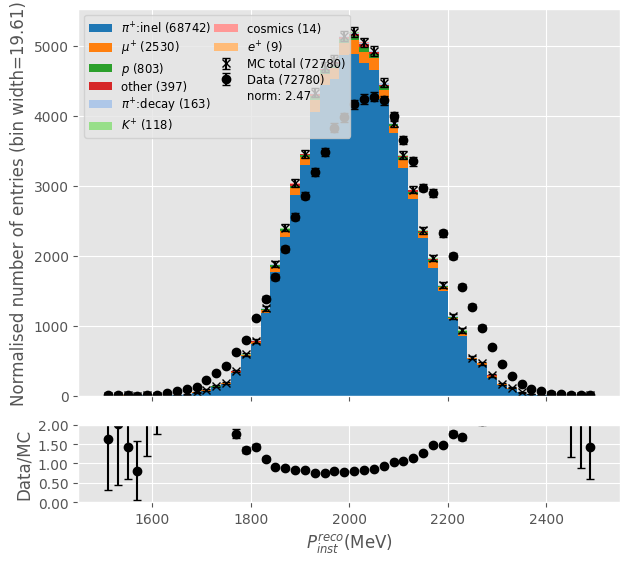

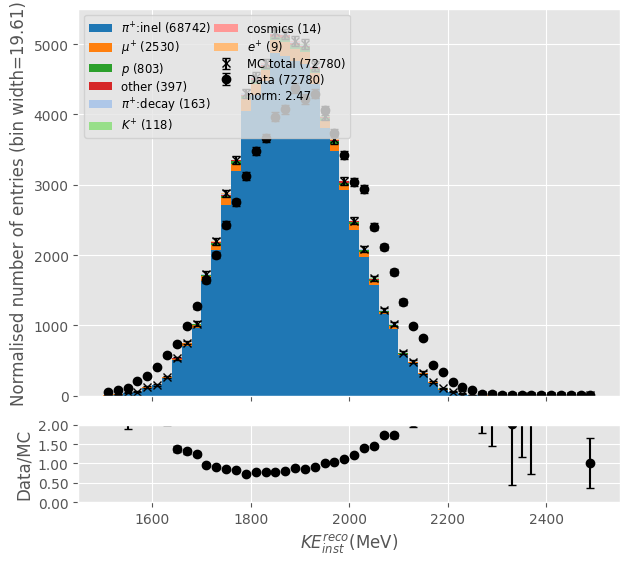

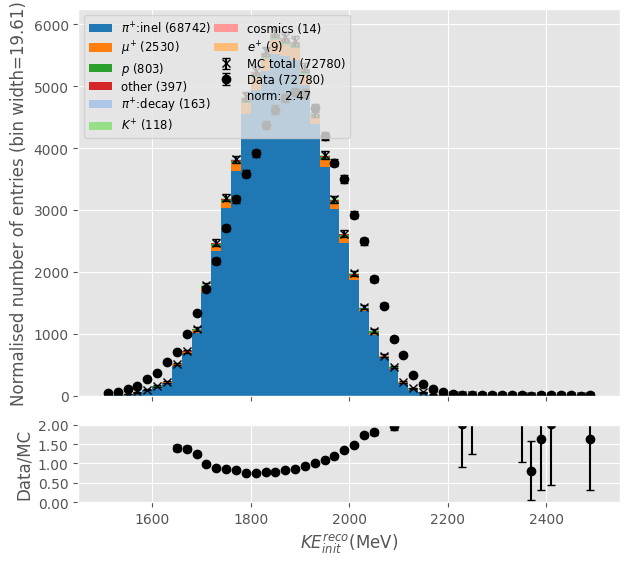

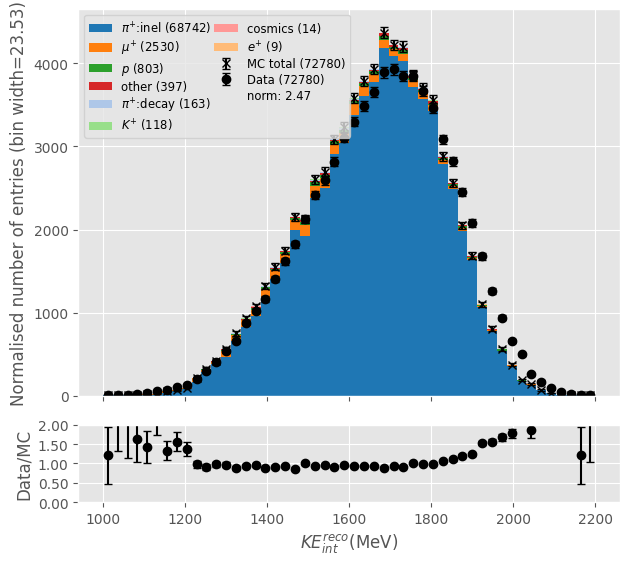

reweighted


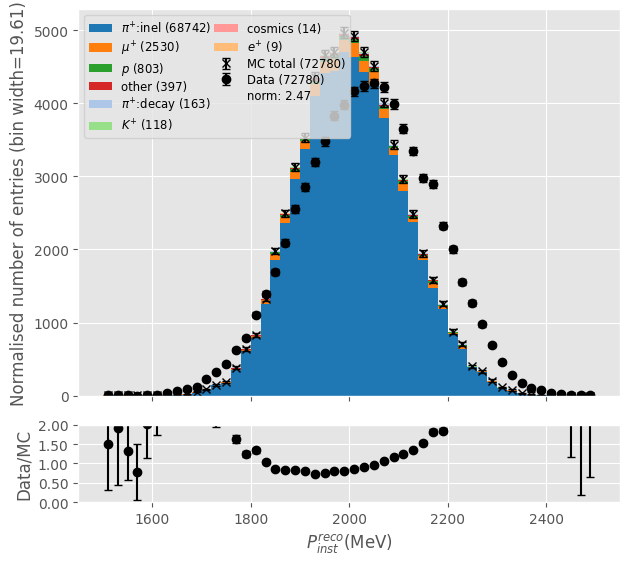

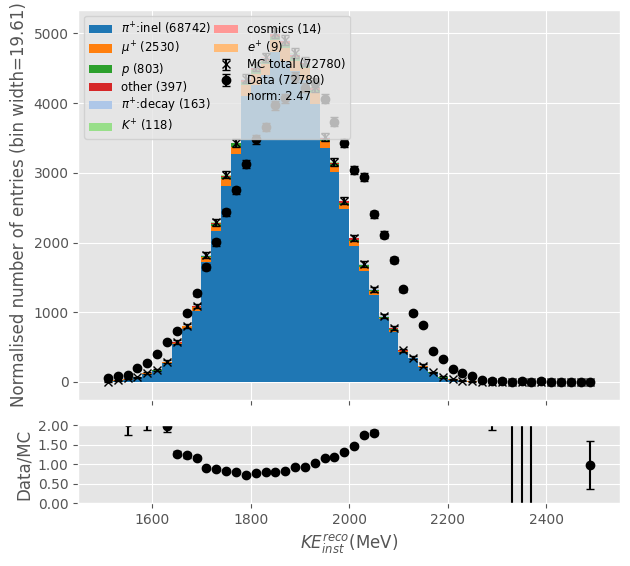

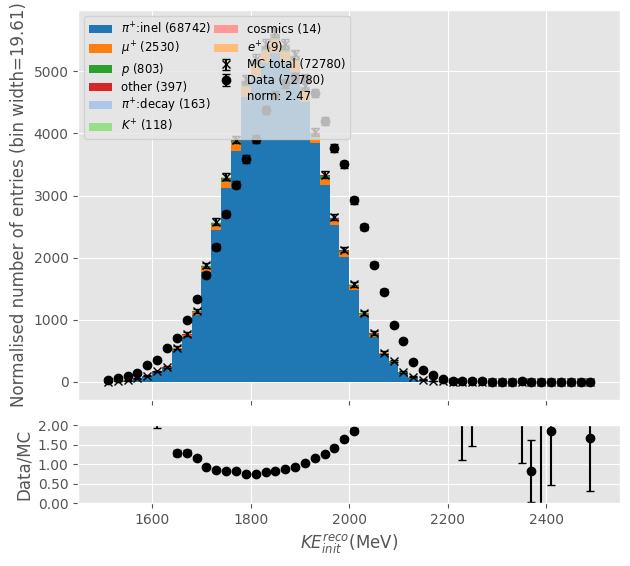

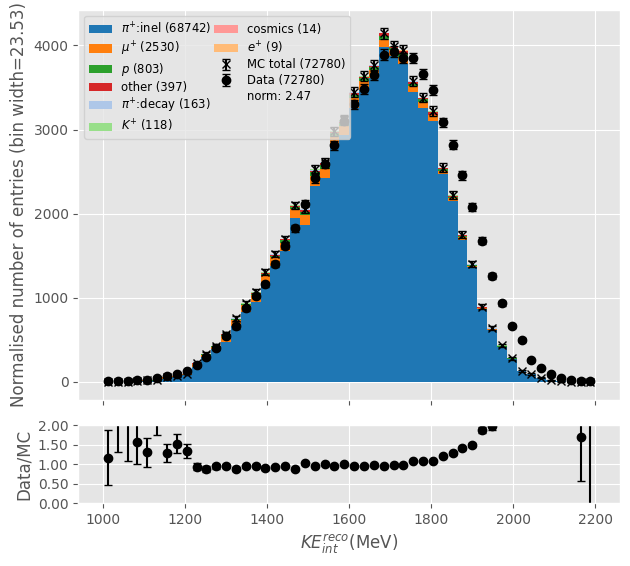

smeared


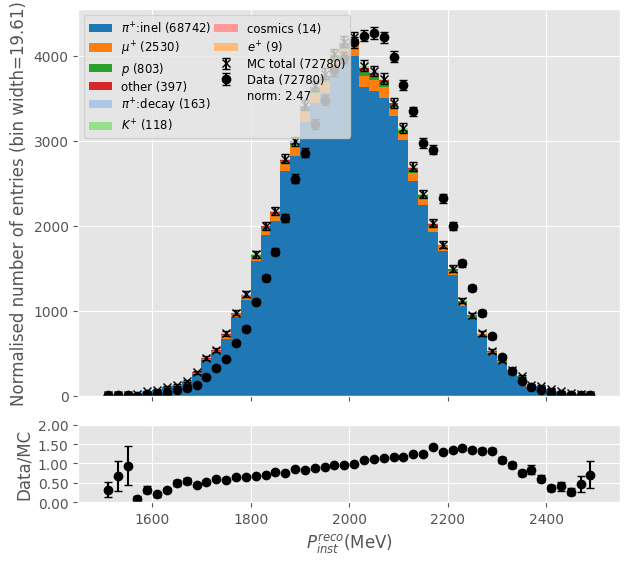

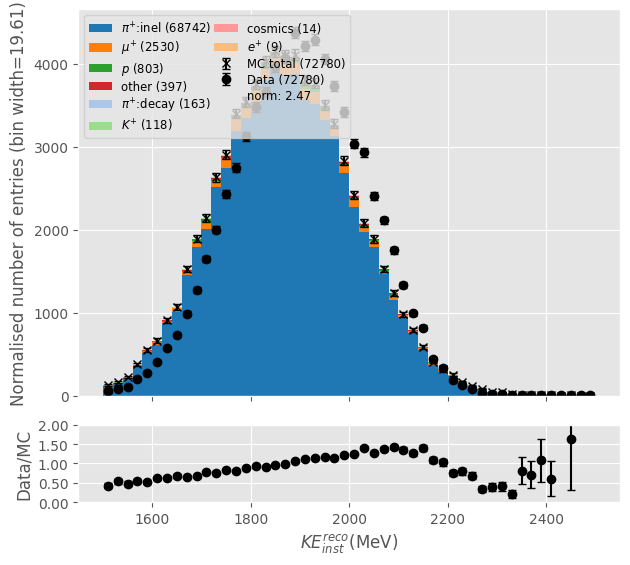

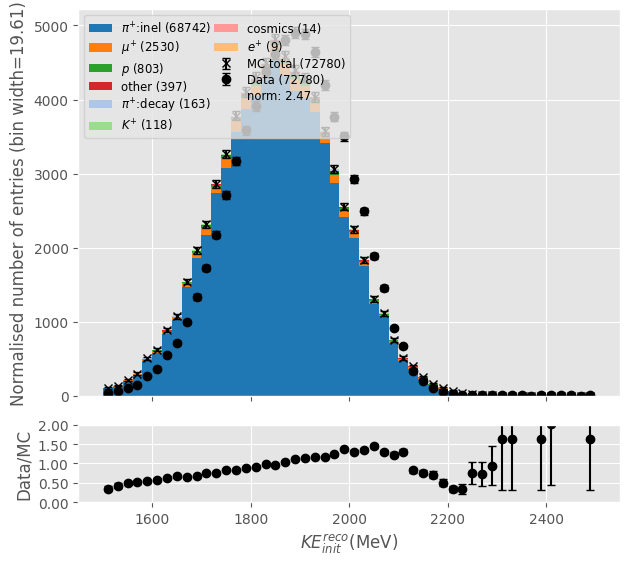

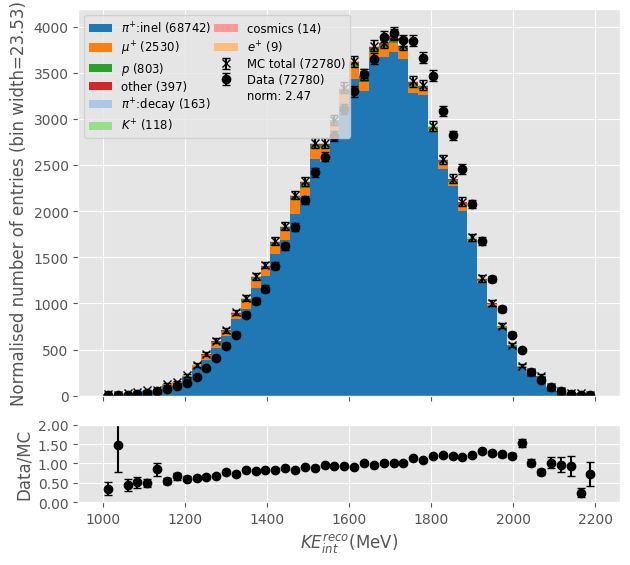

reweight + smeared


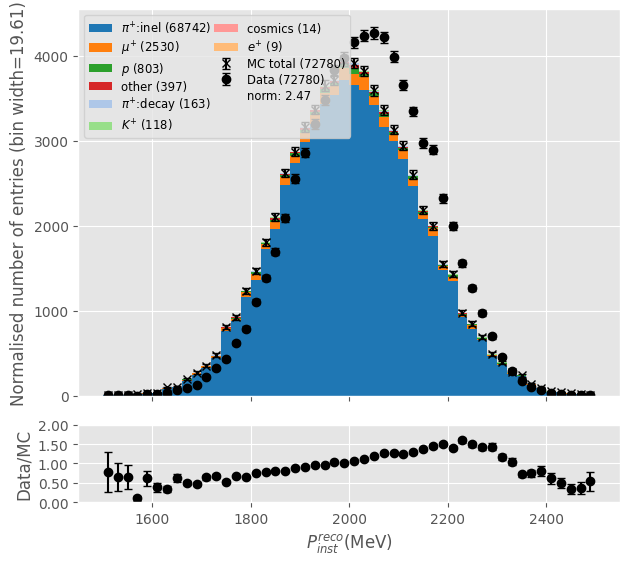

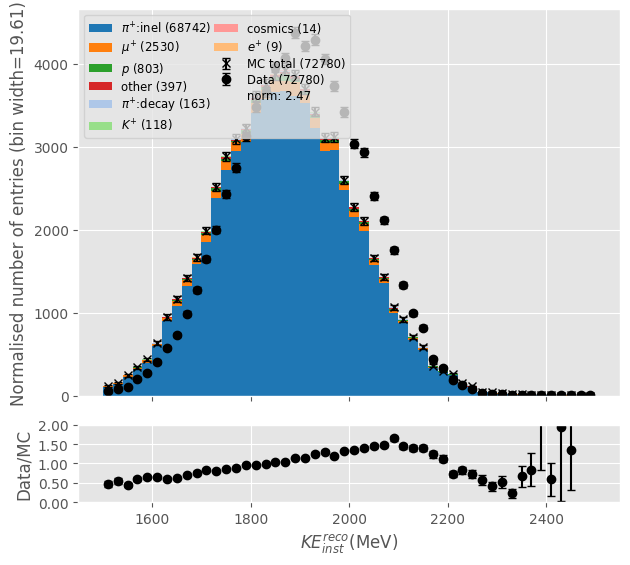

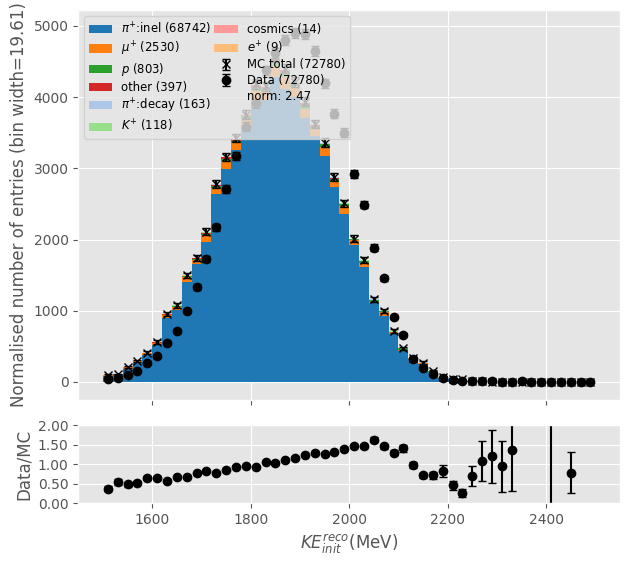

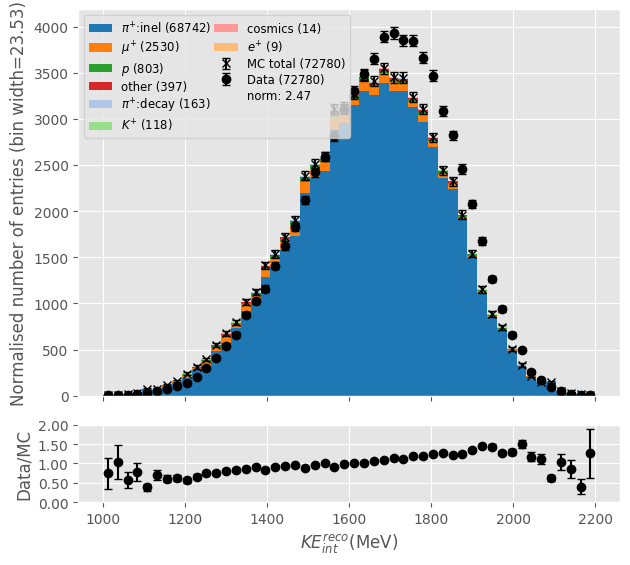

In [24]:
print("nominal")
with Plots.PlotBook("pion_nominal.pdf", False) as book:
    cex_beam_reweight.MakePlots(pion_sample, reco_KE_unsmeared, cross_section.Tags.GenerateTrueBeamParticleTags, args_pion, None, None, book)
Plots.plt.show()

print("reweighted")
with Plots.PlotBook("pion_reweight.pdf", False) as book:
    cex_beam_reweight.MakePlots(pion_sample, reco_KE_unsmeared, cross_section.Tags.GenerateTrueBeamParticleTags, args_pion, weights_pion_sample, None, book)
Plots.plt.show()

print("smeared")
with Plots.PlotBook("pion_smeared.pdf", False) as book:
    cex_beam_reweight.MakePlots(pion_sample, reco_KE_smeared, cross_section.Tags.GenerateTrueBeamParticleTags, args_pion, None, smearing_mc_pions, book)
Plots.plt.show()

print("reweight + smeared")
with Plots.PlotBook("pion_reweight_smeared.pdf", False) as book:
    cex_beam_reweight.MakePlots(pion_sample, reco_KE_smeared_rw, cross_section.Tags.GenerateTrueBeamParticleTags, args_pion, weights_pion_sample, smearing_mc_pions_rw, book)
Plots.plt.show()
